In [1]:
import re
import glob

In [2]:
# Read in cliches into a list
with open("cliche_edited.txt") as cliche_file:
    cliches_list = [line.rstrip() for line in cliche_file]

First we tried to see if we could get any results on one author to check if the cliches existed in the data

In [4]:
# Try running on one author
txt_files = glob.glob("novels_clean/Lewis Carroll/*.txt")

cliche_count = 0

# Read each file
for file in txt_files:
    f = open(file, "r")
    
    # Loop through each line in the text
    for line in f:
        # Check for each cliche
        for cliche in cliches_list:
            if cliche in line:
                cliche_count += 1
    
    f.close()

print("Number of cliches: ")
print(cliche_count)

Number of cliches: 
627


Once that was successful, we tried the same approach on all authors

In [34]:
# Try running on all authors
# Collect list of all author names
folders = glob.glob("novels_clean/*")

# For each author, check # of cliches
for author in folders:
    path = author + "/*.txt"
    txt_files = glob.glob(path)

    cliche_count = 0

    # Read each file
    for file in txt_files:
        f = open(file, "r")

        # Loop through each line in the text
        for line in f:
            # Check for each cliche
            for cliche in cliches_list:
                if cliche in line:
                    cliche_count += 1

        f.close()

    # Print number of cliches found in each authors total files
    print("Number of cliches for " + author + ": ")
    print(cliche_count)

Number of cliches for novels_clean/H.B. Marriott Watson: 
273
Number of cliches for novels_clean/William Harrison Ainsworth: 
2013
Number of cliches for novels_clean/Clemence Housman: 
134
Number of cliches for novels_clean/James Payn: 
762
Number of cliches for novels_clean/Georgiana Fullerton: 
260
Number of cliches for novels_clean/Emma Leslie: 
250
Number of cliches for novels_clean/Frederick Marryat: 
5476
Number of cliches for novels_clean/Leonard Merrick: 
593
Number of cliches for novels_clean/Emily Bronte: 
118
Number of cliches for novels_clean/William Makepeace Thackeray: 
2585
Number of cliches for novels_clean/Florence Marryat: 
293
Number of cliches for novels_clean/Israel Zangwill: 
1932
Number of cliches for novels_clean/Hall Caine: 
2499
Number of cliches for novels_clean/Morley Roberts: 
759
Number of cliches for novels_clean/Ann Radcliffe: 
239
Number of cliches for novels_clean/H.G. Wells: 
4962
Number of cliches for novels_clean/E. Phillips Oppenheim: 
3159
Number 

This gave results, but looking back at our list of expressions, it seems there may be some false positives.  As such, we're going to exclude one-word expressions and add in word boundaries.  Additionaly, we were counting the number of cliches present in the file—we've updated the code to count duplicate occurances of specific cliches.

In [3]:
# Remove single word cliches
new_cliches_list = []
for cliche in cliches_list:
    if " " in cliche.strip():
        new_cliches_list.append(cliche)

In [17]:
# Try new approach running on one author
txt_files = glob.glob("novels_clean/Jane Austen/*.txt")

cliche_count = 0

# Read each file
for file in txt_files:
    f = open(file, "r")
    
    # Loop through each line in the text
    for line in f:
        
        # Check for each cliche
        for cliche in new_cliches_list:
            cliche_count += line.count(cliche)
    
    f.close()

print("Number of cliches: ")
print(cliche_count)

Number of cliches: 
8646


Playing with the results, these seem much more meaningful.  Let's try this for all the authors.

In [23]:
# Dictionary to hold author: cliche count
author_results = {}

In [24]:
# Try running on all authors
# Collect list of all author names
folders = glob.glob("novels_clean/*")

# For each author, check # of cliches
for author in folders:
    path = author + "/*.txt"
    txt_files = glob.glob(path)

    cliche_count = 0

    # Read each file
    for file in txt_files:
        f = open(file, "r")

        # Loop through each line in the text
        for line in f:
            # Check for each cliche
            for cliche in new_cliches_list:
                cliche_count += line.count(cliche)

        f.close()

    # Print number of cliches found in each authors total files
    author = author[13:]
    print("Number of cliches for " + author + ": ")
    print(cliche_count)
    
    # Add to dictionary
    author_results[author] = cliche_count

Number of cliches for H.B. Marriott Watson: 
991
Number of cliches for William Harrison Ainsworth: 
9763
Number of cliches for Clemence Housman: 
322
Number of cliches for James Payn: 
2369
Number of cliches for Georgiana Fullerton: 
1860
Number of cliches for Emma Leslie: 
758
Number of cliches for Frederick Marryat: 
26371
Number of cliches for Leonard Merrick: 
2110
Number of cliches for Emily Bronte: 
548
Number of cliches for William Makepeace Thackeray: 
14037
Number of cliches for Florence Marryat: 
1044
Number of cliches for Israel Zangwill: 
7227
Number of cliches for Hall Caine: 
13542
Number of cliches for Morley Roberts: 
2264
Number of cliches for Ann Radcliffe: 
1846
Number of cliches for H.G. Wells: 
20170
Number of cliches for E. Phillips Oppenheim: 
11341
Number of cliches for R.D. Blackmore: 
18888
Number of cliches for Thomas Hughes: 
4889
Number of cliches for Thomas Love Peacock: 
935
Number of cliches for Edgar Jepson: 
950
Number of cliches for Ouida: 
9448
Numbe

In [25]:
print(author_results)

{'H.B. Marriott Watson': 991, 'William Harrison Ainsworth': 9763, 'Clemence Housman': 322, 'James Payn': 2369, 'Georgiana Fullerton': 1860, 'Emma Leslie': 758, 'Frederick Marryat': 26371, 'Leonard Merrick': 2110, 'Emily Bronte': 548, 'William Makepeace Thackeray': 14037, 'Florence Marryat': 1044, 'Israel Zangwill': 7227, 'Hall Caine': 13542, 'Morley Roberts': 2264, 'Ann Radcliffe': 1846, 'H.G. Wells': 20170, 'E. Phillips Oppenheim': 11341, 'R.D. Blackmore': 18888, 'Thomas Hughes': 4889, 'Thomas Love Peacock': 935, 'Edgar Jepson': 950, 'Ouida': 9448, 'Maurice Hewlett': 6204, 'Thomas Hardy': 12908, 'Walter Besant': 9368, 'G.A. Henty': 61749, 'Bernard Capes': 7192, 'Charles Dickens': 37035, 'Frederick Rolfe': 610, 'Hugh Conway': 403, 'Maria Edgeworth': 11079, 'Elizabeth Gaskell': 13872, 'William Godwin': 2159, 'Walter Pater': 1152, 'Grace Aguilar': 3679, 'Charles Kingsley': 6568, 'Charlotte Bronte': 3395, 'George Grossmith': 279, 'Anthony Trollope': 56956, 'Flora Annie Steel': 10062, 'Ame

We decided to rerun the code while taking into account the length of cliches so that we can determine the cliche cover to see how much of these authors' texts are composed of cliches.  We are also checking what the top ten cliches are and the average cliche length.

In [22]:
# Try running on all authors
# Collect list of all author names
folders = glob.glob("novels_clean/*")

average_cliche_lengths = {}    # Counts across all authors
for i in range(2, 22):
    average_cliche_lengths[i] = 0
    
most_common_cliches = {}    # Holds cliche: count over all authors
for cliche in new_cliches_list:
    most_common_cliches[cliche] = 0
    
author_cliche_cover = {}    # Holds number of words that are part of a cliche

# For each author, check # of cliches
for author in folders:
    path = author + "/*.txt"
    txt_files = glob.glob(path)

    cliche_cover = 0
    author_texts_len = 0

    # Read each file
    for file in txt_files:
        f = open(file, "r")

        # Loop through each line in the text
        for line in f:
            # Check for each cliche
            for cliche in new_cliches_list:
                occurances = line.count(cliche)
                cliche_word_len = cliche.count(" ") + 1
                
                cliche_cover += cliche_word_len * occurances
                average_cliche_lengths[cliche_word_len] += occurances
                most_common_cliches[cliche] += occurances
                
                author_texts_len += line.count(" ") + 1

        f.close()

    # Print number of cliches found in each authors total files
    author = author[13:]
    print("Number of words covered by cliches for " + author + ": ")
    print(cliche_cover)
    
    # Add to dictionary
    author_cliche_cover[author] = cliche_cover/author_texts_len
    
    print("Cliche cover for " + author + ": ")
    print(author_cliche_cover[author])

Number of words covered by cliches for H.B. Marriott Watson: 
2085
Cliche cover for H.B. Marriott Watson: 
4.577043429271091e-06
Number of words covered by cliches for William Harrison Ainsworth: 
19915
Cliche cover for William Harrison Ainsworth: 
2.9511141210812176e-06
Number of words covered by cliches for Clemence Housman: 
667
Cliche cover for Clemence Housman: 
2.833101843002833e-06
Number of words covered by cliches for James Payn: 
4954
Cliche cover for James Payn: 
3.6351923484909946e-06
Number of words covered by cliches for Georgiana Fullerton: 
3848
Cliche cover for Georgiana Fullerton: 
4.032272768750037e-06
Number of words covered by cliches for Emma Leslie: 
1590
Cliche cover for Emma Leslie: 
4.411958616605125e-06
Number of words covered by cliches for Frederick Marryat: 
54504
Cliche cover for Frederick Marryat: 
3.6393373619742043e-06
Number of words covered by cliches for Leonard Merrick: 
4382
Cliche cover for Leonard Merrick: 
4.1128668269865035e-06
Number of words

In [23]:
print(author_cliche_cover)

{'H.B. Marriott Watson': 4.577043429271091e-06, 'William Harrison Ainsworth': 2.9511141210812176e-06, 'Clemence Housman': 2.833101843002833e-06, 'James Payn': 3.6351923484909946e-06, 'Georgiana Fullerton': 4.032272768750037e-06, 'Emma Leslie': 4.411958616605125e-06, 'Frederick Marryat': 3.6393373619742043e-06, 'Leonard Merrick': 4.1128668269865035e-06, 'Emily Bronte': 3.3524191771965407e-06, 'William Makepeace Thackeray': 3.3473635120887387e-06, 'Florence Marryat': 4.390180467904592e-06, 'Israel Zangwill': 3.597240473216866e-06, 'Hall Caine': 4.412914168613935e-06, 'Morley Roberts': 4.343777211597381e-06, 'Ann Radcliffe': 2.563701767000333e-06, 'H.G. Wells': 3.83630501809872e-06, 'E. Phillips Oppenheim': 3.8044173032828316e-06, 'R.D. Blackmore': 4.616115613439488e-06, 'Thomas Hughes': 4.387103188850134e-06, 'Thomas Love Peacock': 3.1888294653048848e-06, 'Edgar Jepson': 3.8087432836571693e-06, 'Ouida': 3.460231640918486e-06, 'Maurice Hewlett': 4.126422426316894e-06, 'Thomas Hardy': 3.74

In [24]:
print(average_cliche_lengths)

{2: 620273, 3: 34839, 4: 4588, 5: 787, 6: 316, 7: 15, 8: 41, 9: 1, 10: 2, 11: 3, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0}


In [25]:
print(most_common_cliches)

{"'t be season": 3, 'be season': 206, 'day late dollar short': 0, 'dog life': 106, 'drop in bucket': 2, 'face like bulldog chewing on wasp': 0, 'face like burst couch': 0, 'face like dropped meat pie': 0, 'face only mother must love': 0, 'face must scare dog out of butcher shop': 0, 'fast buck': 0, 'feather in cap': 98, 'good beginning make good ending': 2, 'good man be hard to find': 0, 'journey of thousand mile begin with first step': 0, 'king ransom': 52, 'knock off': 339, 'knuckle sandwich': 0, 'long shot': 44, 'marked man': 122, 'rolling stone gather moss': 24, 'snail pace': 34, 'stitch in time save nine': 12, 'stone throw away': 28, 'wolf in sheep clothing': 54, 'eleventh hour': 176, 'dog bollock': 0, 'elephant in room': 0, 'end justify mean': 0, 'face launched thousand ship': 4, 'fickle finger of fate': 0, 'grass be always greener on other side': 0, 'jury be still out': 0, 'more thing change more stay same': 0, 'more learn le know': 0, 'whole nine yard': 0, 'worm have turned': 2

Let's visualize the lengths of the cliches found and see what the 10 most common ones are

In [5]:
import matplotlib.pyplot as plt

In [7]:
average_cliche_lengths = {2: 620273, 3: 34839, 4: 4588, 5: 787, 6: 316, 7: 15, 8: 41, 9: 1, 10: 2, 11: 3}

In [11]:
most_common_cliches = {"'t be season": 3, 'be season': 206, 'day late dollar short': 0, 'dog life': 106, 'drop in bucket': 2, 'face like bulldog chewing on wasp': 0, 'face like burst couch': 0, 'face like dropped meat pie': 0, 'face only mother must love': 0, 'face must scare dog out of butcher shop': 0, 'fast buck': 0, 'feather in cap': 98, 'good beginning make good ending': 2, 'good man be hard to find': 0, 'journey of thousand mile begin with first step': 0, 'king ransom': 52, 'knock off': 339, 'knuckle sandwich': 0, 'long shot': 44, 'marked man': 122, 'rolling stone gather moss': 24, 'snail pace': 34, 'stitch in time save nine': 12, 'stone throw away': 28, 'wolf in sheep clothing': 54, 'eleventh hour': 176, 'dog bollock': 0, 'elephant in room': 0, 'end justify mean': 0, 'face launched thousand ship': 4, 'fickle finger of fate': 0, 'grass be always greener on other side': 0, 'jury be still out': 0, 'more thing change more stay same': 0, 'more learn le know': 0, 'whole nine yard': 0, 'worm have turned': 2, 'close rank': 16, 'egg on': 91, 'bad egg': 22, 'bed of rose': 41, 'bee in bonnet': 40, 'bird in hand be worth two in bush': 24, 'blast from past': 0, 'blot on landscape': 1, 'bolt from blue': 31, 'bull in china shop': 42, 'bun in oven': 0, 'bunch of five': 2, 'chain be only a strong a weakest link': 0, 'cheap knock off': 0, 'chip off old block': 2, 'closed mouth gather foot': 0, 'cult of personality': 0, 'curate egg': 0, 'daniel come to judgement': 0, 'dead ringer': 0, 'diamond in rough': 6, 'diamond be forever': 0, 'dish fit for god': 1, 'faint heart never true love know': 0, 'far cry': 22, 'fate worse than death': 2, 'few fry short of happy meal': 0, 'few sandwich short of picnic': 0, 'fish out of water': 94, 'fly in ointment': 30, 'fool money be soon parted': 6, 'fool paradise': 86, 'foregone conclusion': 63, 'friend in need be friend indeed': 11, 'frog in throat': 0, 'game of two half': 0, 'good rule of thumb': 0, 'grammar guru style editor writing mentor in one package': 0, 'hair of dog bit': 10, 'half baked idea': 0, 'horse of different colour': 0, 'horse horse kingdom for horse': 1, 'house divided against can not stand': 0, 'jack of trade master of none': 10, 'knight in shining armor': 0, 'knock back': 1, 'labour of love': 94, 'legend in one own lifetime': 0, 'leopard doe change spot': 0, 'lick promise': 1, 'little bird told': 4, 'little knowledge be dangerous thing': 6, 'little yeast work through whole batch of dough': 0, 'little of little of': 6, 'load of cobbler': 0, 'load of old cobbler': 0, 'long way away': 10, 'lot of empty flattery': 0, 'man after own heart': 23, 'man for season': 0, 'man home be castle': 0, 'mexican standoff': 0, 'mexican wave': 0, 'mickey finn': 0, 'mind be terrible thing to waste': 0, 'moveable feast': 0, 'multitude of sin': 49, 'nation of shopkeeper': 20, 'necessary evil': 60, 'nest egg': 54, 'new do': 403, 'new lease of life': 19, 'penny saved be penny earned': 0, 'picture worth thousand word': 0, 'pig in poke': 26, 'pink elephant': 1, 'place for everything everything in place': 2, 'plague on house': 0, 'riddle wrapped up in enigma': 0, 'rose by other name must smell a sweet': 1, 'rose be rose be rose': 0, 'rum do': 30, 'safe pair of hand': 0, 'sea change': 15, 'shoestring budget': 0, 'shot across bow': 8, 'shot in arm': 6, 'shot in dark': 46, 'shotgun wedding': 0, 'sight for sore eye': 7, 'sledgehammer to crack nut': 0, 'sorry sight': 20, 'spoon full of sugar help medicine go down': 0, 'sticky wicket': 0, 'sweet deal': 0, 'taste of own medicine': 0, 'thorn in flesh': 33, 'tinker damn': 1, 'watched pot never boil': 4, 'white elephant': 98, 'wide berth': 132, 'winning combination': 0, 'woman need man like fish need bicycle': 0, 'abandon ship': 3, 'ablaze with light': 15, 'about face': 303, 'above board': 112, 'absence make heart grow fonder': 9, 'absolute power corrupts absolutely': 0, 'ace up sleeve': 0, 'ace in hole': 1, 'achilles heel': 3, 'acid test': 0, 'act giddy goat': 0, 'action speak louder than word': 2, 'after own heart': 112, 'ah to be young foolish': 0, 'dirty laundry': 0, 'bent out of shape': 2, 'bet be off': 6, 'booster payload': 0, 'dressed up nowhere to go': 0, 'finger thumb': 222, 'foam beer': 0, 'hammer nail': 24, 'hand on deck': 30, 'hand to pump': 2, 'hat cattle': 38, 'heck break loose': 0, 'hell break loose': 0, 'icing cake': 1, 'lime salt tequila': 0, 'missile warhead': 0, 'pale in comparison': 0, 'road lead to rome': 6, 'shot powder': 7, 'sizzle steak': 0, 'talk action': 2, 'glitter be not gold': 1, 'bag of chip': 0, 'wax wick': 1, 'work play make jack dull boy': 7, 'for one one for': 0, 'in due time': 654, 'in day work': 54, 'be vanity': 171, 'over map': 37, 'bit piece': 14, 'world stage': 20, 'fair in love war': 33, 'well that end well': 93, 'almighty dollar': 11, 'already got one paw on chicken coop': 0, 'alrighty then': 0, 'altitude be determined by attitude': 0, 'always look on bright side': 0, 'always bridesmaid': 0, 'always bridesmaid never bride': 0, 'be brother keeper': 6, 'ambulance chaser': 0, 'apple day keep doctor away': 0, 'arm leg': 678, 'idle mind be devil playground': 0, 'ill wind': 261, 'oldie goodie': 0, 'ounce of prevention be worth pound of cure': 0, 'can take to bank': 0, 'day dollar': 0, 'nail in coffin': 8, 'ant in pant': 0, 'friend of yours be friend of mine': 0, 'port in storm': 4, 'anything go': 273, 'apple doe fall far from tree': 0, 'acron doe fall far from tree': 0, 'apple of eye': 77, 'apple pie order': 20, 'be fair dinkum': 0, 'be man mouse': 1, 'armchair quarterback': 0, 'armed to teeth': 83, 'army brat': 0, 'around horn': 0, 'art imitates life': 0, 'artsy craftsy': 0, 'artsy fartsy': 0, 'a alike a two pea in pod': 0, 'a beautiful a day be long': 0, 'a brown a berry': 7, 'a busy a bee': 16, 'a cool a cucumber': 45, 'a dense a london fog': 0, 'a easy a pie': 1, 'a far a eye can see': 1, 'a fine a frog hair': 0, 'a good a gold': 109, 'a happy a larry': 0, 'a happy a clam': 0, 'a happy a sandboy': 1, 'a honest a day be long': 0, 'a if': 52403, 'a keen a mustard': 3, 'a luck must have': 96, 'a old a methuselah': 12, 'a old a time': 3, 'a plain a nose on face': 11, 'a pleased a punch': 15, 'a snug a bug in rug': 1, 'a straight a die': 4, 'a tender a mother heart': 0, 'a useful a tit on bull': 0, 'a useful a lead balloon': 0, 'a welcome a skunk at lawn party': 0, 'a white a snow': 87, 'a ye sow so will ye reap': 1, 'a crow fly': 47, 'ash to ash dust to dust': 15, 'ask question will tell lie': 4, 'ask not what country can do for what can do for country': 0, 'asleep at wheel': 0, 'as backwards': 2, 'as over tea kettle': 0, 'at loggerhead': 24, 'at six seven': 60, 'at wit end': 157, 'at crack of dawn': 0, 'at drop of hat': 0, 'at eleventh hour': 154, 'at end of rope': 25, 'at end of tether': 15, 'at end of day': 118, 'at last minute': 36, 'atta boy': 0, 'atta girl': 0, 'ax to grind': 2, 'babe in wood': 34, 'baby blue': 0, 'baby boomer': 0, 'back against wall': 151, 'back up': 2137, 'back from dead': 15, 'back in sec': 15, 'back in saddle': 4, 'back field': 3, 'back to basic': 0, 'back to square one': 0, 'back to drawing board': 1, 'back handed comment': 0, 'back handed compliment': 1, 'back seat driver': 0, 'back stabber': 0, 'backroom boy': 0, 'bad blood': 90, 'bad call': 14, 'bad hair day': 0, 'bad seed': 2, 'bad to bone': 0, 'badge of honor': 2, 'badgered to death': 0, 'bag lady': 4, 'bag baggage': 76, 'bag packed ready to go': 0, 'bait switch': 0, 'baker dozen': 15, 'ball chain': 3, 'ball be in court': 0, 'ballpark figure': 0, 'ball to wall': 0, 'banding together to beat odds': 0, 'bandy word': 45, 'bang on about': 0, 'banging head against brick wall': 0, 'bank on': 253, 'baptism by fire': 0, 'baptism of fire': 11, 'bare bone': 18, 'barefaced liar': 0, 'barge in': 19, 'barge right in': 0, 'bark up wrong tree': 0, 'bark be worse than bite': 50, 'barking mad': 2, 'barking up wrong tree': 0, 'basket case': 0, 'bat eyelid': 0, 'bat out of hell': 0, 'bat idea around': 0, 'bated breath': 98, 'bat in belfry': 2, 'batten down hatch': 5, 'battle royal': 32, 'be afraid be very afraid': 0, 'be still beating heart': 0, 'be there be square': 0, 'be in same boat': 57, 'bear down': 88, 'beast with two back': 0, 'beat about bush': 51, 'beat around bush': 0, 'beat by long chalk': 0, 'beat sword into ploughshare': 2, 'beat dead horse': 0, 'beat hasty retreat': 32, 'beat bush': 9, 'beat living daylight out of someone': 0, 'beauty be only skin deep': 9, 'beauty be fading flower': 0, 'beauty be in eye of beholder': 0, 'bee knee': 0, 'beelzebub have devil for sideboard': 0, 'be there done that': 0, 'beetle browed': 21, 'before must say jack robinson': 9, 'before be gleam in father eye': 0, 'beg question': 8, 'beggar ca be chooser': 6, 'behind great man there be great woman': 0, 'behind eight ball': 0, 'behind time': 156, 'being led down garden path': 0, 'belle of ball': 10, 'bell whistle': 2, 'below belt': 24, 'belt up': 4, 'belt brace': 2, 'bend over backwards': 0, 'best bib tucker': 4, 'best foot forward': 5, 'best thing since sliced bread': 0, 'best laid plan of mouse men': 0, 'bet bottom dollar': 12, 'bet farm': 0, 'better half': 222, 'better late than never': 69, 'better light candle than curse darkness': 0, 'better mousetrap': 0, 'better safe than sorry': 0, 'better than ever': 133, 'better than kick in teeth': 0, 'better devil know': 2, 'better devil know than devil': 2, 'better to have loved lost than never to have loved at': 2, 'better to remain silent be thought fool to speak remove doubt': 0, 'between two stool': 33, 'between bed post': 0, 'between rock hard place': 0, 'between devil deep blue sea': 0, 'beware of greek bearing gift': 0, 'beware ides of march': 0, 'beyond ken': 44, 'beyond pale': 67, 'bib tucker': 9, 'big a life': 5, 'big a house': 9, 'big cheese': 2, 'big fish in small pond': 0, 'big man on campus': 0, 'big picture': 13, 'big wig': 60, 'bigger be': 32, 'bigger be harder fall': 0, 'billy mate': 2, 'biological clock be ticking': 0, 'bird in gilded cage': 2, 'gilded cage': 10, 'bird in hand': 43, 'bird bee': 14, 'bird of feather flock together': 8, 'bird of feather': 39, 'bite tongue': 33, 'bite off more than can chew': 0, 'bite bullet': 0, 'bite dust': 20, 'bitter disappointment': 136, 'black a coal': 29, 'black a pitch': 26, 'black sheep of family': 4, 'black on black': 0, 'blackball someone': 0, 'blaze new trail': 0, 'bleed like stuck pig': 0, 'bleeding heart': 127, 'blew away': 36, 'blew wad': 0, 'blind a bat': 17, 'blind leading blind': 16, 'blonde bombshell': 0, 'blood brother': 23, 'blood money': 55, 'blood sweat tear': 0, 'blood thunder': 18, 'blood be thicker than water': 32, 'blood on hand': 37, 'bloody minded': 27, 'bloom be off rose': 0, 'blow chunk': 0, 'blow down': 46, 'blow joint': 0, 'blow pop stand': 0, 'blow pop joint': 0, 'blow brain out': 84, 'blow mind': 8, 'blow own trumpet': 10, 'blow gasket': 0, 'blow whistle on': 0, 'blowing smoke': 5, 'blown away': 103, 'blue blood': 51, 'blue in face': 11, 'blunt word have sharpest edge': 0, 'blushing bride': 15, 'bob be uncle': 0, 'bodice ripper': 0, 'bog standard': 0, 'boil down to': 9, 'bone dry': 1, 'bone idle': 0, 'bone up on': 0, 'bone of contention': 45, 'bone to pick': 12, 'bone chilling cold': 0, 'booby prize': 0, 'booby trap': 10, 'boot be on other foot': 0, 'booze cruise': 0, 'booze broad': 0, 'bored to tear': 3, 'born within sound of bow bell': 3, 'born yesterday': 27, 'born raised': 0, 'born with silver spoon in mouth': 24, 'botch job': 0, 'bottom drawer': 9, 'bottom line': 18, 'bottom of barrel': 3, 'bought farm': 10, 'bounce back': 1, 'bowl someone over': 0, 'box in': 677, 'boy will be boy': 25, 'bragging right': 0, 'brain drain': 0, 'brain dump': 0, 'brand spanking new': 0, 'brass tack': 0, 'break leg': 59, 'break ice': 49, 'bright a button': 0, 'bring home bacon': 0, 'bring on': 518, 'bring sand to beach': 0, 'broad in beam': 6, 'broke bank': 15, 'broken record': 4, 'brother keeper': 14, 'brother can spare dime': 0, 'brownie point': 0, 'buck naked': 0, 'buck stop here': 0, 'buckle down': 0, 'build better mousetrap world will beat path to door': 0, 'built like brick shthouse': 0, 'built like tank': 0, 'built to last': 0, 'bull by horn': 81, 'bum steer': 0, 'bump in night': 0, 'bump in road': 0, 'bump on log': 0, 'bum on seat': 0, 'bunny boiler': 0, 'burn bridge': 0, 'burn ship': 9, 'burn candle at end': 4, 'burn midnight oil': 2, 'burning up track': 0, 'bury head in sand': 0, 'bury hatchet': 14, 'business a usual': 22, 'business at hand': 1, 'bust ball': 0, 'bust chop': 0, 'busting gut': 0, 'busy a bear in beehive': 0, 'busy a bee': 23, 'busy a one armed paperhanger': 0, 'busy a one legged man in as kicking contest': 0, 'busy hand be happy hand': 0, 'enough about': 248, 'butt of joke': 1, 'butter up': 3, 'butter must melt in mouth': 19, 'butterfly in stomach': 0, 'buy something for song': 0, 'buy pig in poke': 3, 'buy into': 2, 'by mean after': 4, 'by george': 1050, 'by gum': 47, 'by hook by crook': 64, 'by large': 468, 'by same token': 77, 'by skin of teeth': 20, 'call day': 44, 'call spade spade': 14, 'call off dog': 5, 'call shot': 2, 'calm before storm': 11, 'can of whoop as': 0, 'can of worm': 1, 'get to first base with': 0, 'ca beat that with stick': 0, 'ca blame for trying': 0, 'ca cut': 16, 'ca cut mustard': 0, 'ca get word in edgewise': 0, 'ca have cake eat too': 0, 'ca hold candle to': 5, 'ca judge book by cover': 0, 'ca learn to swim without getting in water': 0, 'ca say enough about': 0, 'ca squeeze blood out of turnip': 0, 'ca teach old dog new trick': 8, 'ca win for losing': 0, 'ca for life of remember': 2, 'candle at end': 20, 'cant say must': 4, 'carbon copy': 3, 'carpe diem': 18, 'seize day': 0, 'carrot on stick': 0, 'carry coal to newcastle': 2, 'carry can': 50, 'carry team': 0, 'carte blanche': 202, 'case in point': 58, 'case of mistaken identity': 10, 'cash cow': 0, 'cash in': 77, 'cash in chip': 0, 'cash be king': 0, 'cash on nail': 3, 'cast very long shadow': 1, 'cat got tongue': 0, 'cat out of bag': 56, 'cat whisker': 10, 'cat like grace': 0, 'catch drift': 8, 'get drift': 2, 'catch forty wink': 0, 'catch hell if do': 0, 'catch falling knife': 0, 'catch on': 171, 'catching z': 1, 'caught between scylla charybdis': 0, 'caught between rock hard place': 0, 'caught off guard': 3, 'caught red handed': 21, 'caught by short hair': 0, 'caught in crossfire': 0, 'caught with hand in till': 0, 'caught with pant down': 0, 'caught with hand in cookie jar': 0, 'chain be only a strong a be weakest link': 0, 'chalk cheese': 0, 'champ at bit': 0, 'champagne taste beer budget': 0, 'change tune': 5, 'change hand': 29, 'channel surfing': 0, 'chapter verse': 32, 'charity begin at home': 35, 'charm offensive': 0, 'charm pant off': 0, 'charmed life': 84, 'chatty cathy': 0, 'cheap shot': 0, 'cheap trick': 0, 'cheap at price': 19, 'check out': 6, 'check in mail': 0, 'checkered career': 0, 'cherchez la femme': 10, 'chew out': 0, 'chew cud': 14, 'chew fat': 0, 'chewing nail spitting tack': 0, 'chick flick': 0, 'chicken come home to roost': 4, 'chief cook bottle washer': 0, 'child play': 381, 'child must be seen not heard': 1, 'chink in armor': 0, 'chip in': 24, 'chip on shoulder': 1, 'chit chat': 35, 'chock full': 59, 'chock block': 5, 'chomping at bit': 0, 'chop change': 14, 'chow down': 0, 'chuck nana': 0, 'throwing tantrum': 0, 'clam up': 0, 'clapped out': 1, 'clash of titan': 0, 'clean a whistle': 9, 'clean bill of health': 8, 'clean sweep': 72, 'cleanliness be next to godliness': 8, 'clear a mud': 8, 'clear a bell': 15, 'clear blue water': 13, 'clear air': 114, 'clear deck': 34, 'climb on bandwagon': 0, 'climbing wall': 12, 'close call': 13, 'close early often': 0, 'close enough for jazz': 0, 'close only count in horseshoe': 0, 'close quarter': 336, 'close eye think of england': 0, 'close cigar': 0, 'closing barn door after horse have bolted': 0, 'cloud cuckoo land': 3, 'clucking bucking with other hen': 0, 'clue in': 41, 'coast to coast': 1, 'cock up': 17, 'cock bull story': 66, 'cockle of heart': 13, 'coin phrase': 4, 'cold a ice': 95, 'cold a witch tit': 0, 'cold comfort': 73, 'cold enough to freeze ball off brass monkey': 0, 'cold foot': 25, 'cold hand warm heart': 0, 'cold shoulder': 218, 'cold turkey': 9, "come a'callin": 0, 'come again': 1541, 'come hell high water': 0, 'come up short': 0, 'come up trump': 1, 'come what may': 118, 'come cropper': 16, 'come in under wire': 0, 'come out of closet': 0, 'coming apart at seam': 0, 'coming down in bucket': 0, 'coming down pike': 0, 'communist conspiracy': 0, 'comparing apple to orange': 0, 'conniption fit': 0, 'contemplate navel': 0, 'cook one goose': 0, 'cook book': 2, 'cooking with gas': 0, 'cool a cucumber': 58, 'cool britannia': 0, 'cool heel': 12, 'cool jet': 0, 'copper bottomed guarantee': 0, 'cor blimey': 0, 'cost arm leg': 0, 'cotton on to someone': 0, 'must care le': 8, 'must do to save soul': 0, 'must do to save hide': 0, 'must fight way out of wet paper sack': 0, 'must fight way out of wet paper bag': 0, 'must get to first base': 0, 'must make head tail of': 18, 'count blessing': 3, 'countless hour': 2, 'cover as': 50, 'crack down': 7, 'crack code': 0, 'crack whip': 16, 'cracker jack': 0, 'cracking up': 9, 'crammed in like sardine': 0, 'crazy a march hare': 0, 'mad a march hare': 72, 'crazy a loon': 1, 'crazy like fox': 0, 'cream of crop': 0, 'creature comfort': 78, 'credit where credit be due': 2, 'creme de la creme': 4, 'crime doe pay': 0, 'crime in street': 0, 'crocodile tear': 20, 'cross line': 118, 'crossing rubicon': 11, "cruisin ' for bruisin '": 0, 'cry havoc let slip dog of war': 0, 'cry river': 1, 'cry wolf': 1, 'cry over spilled milk': 4, 'curb enthusiasm': 1, 'curiosity killed cat': 0, 'curry favor': 17, 'curse blue streak': 0, 'cut corner': 5, 'cut out': 1081, 'cut ice': 4, 'cut loss': 3, 'cut teeth': 12, 'cut fine figure': 1, 'cut dried': 71, 'cut run': 76, 'cut from same cloth': 0, 'cut off nose to spite face': 4, 'cut mustard': 0, 'cut to chase': 0, 'cut to quick': 152, 'cute a button': 0, 'cut like knife': 21, 'cut to core': 4, 'cutting through red tape': 0, 'dagger in heart': 15, 'knife in heart': 20, 'damned if do damned if': 0, 'dance with devil': 0, 'beat of different drummer': 0, 'dangle carrot in front of': 0, 'dark horse': 52, 'darkest before dawn': 4, 'darting to fro': 3, 'dat dawg hunt more': 0, 'david versus goliath': 0, 'davy jones locker': 5, 'daylight robbery': 0, 'dead a dodo': 0, 'dead a doornail': 7, 'deal with': 2385, 'dealt fatal blow': 3, 'death destruction': 20, 'death tax': 1, 'death by thousand cut': 0, 'death doorstep': 0, 'deep in thought': 107, 'deer in headlight': 0, 'designer stubble': 0, 'deus ex machina': 16, 'devil be in detail': 0, 'die hard': 25, 'different kettle of fish': 0, 'dig into hole': 0, 'dim view': 4, 'dip toe in water': 0, 'dirt cheap': 51, 'distance make heart grow fonder': 0, 'do a say not a do': 1, 'do bird fly': 0, 'call will call': 1, 'count chicken before hatch': 0, 'go there': 4684, 'have clue': 272, 'keep dog bark': 2, 'look gift horse in mouth': 27, 'poke bear': 1, 'pull leg': 7, 'do unto others a must have other do unto': 0, 'do what take': 2, 'do one eighty': 0, 'do die': 54, 'doe not know shit from shinola': 0, 'doe bear sht in wood': 0, 'doe have prayer': 1, 'doe know if be washing hanging out': 0, 'doe stand chance': 0, 'dog day': 71, 'dog eat dog': 0, 'dog tired': 45, 'dog in manger': 73, 'dog breakfast': 0, 'dog dinner': 9, 'dog bark caravan move on': 0, 'dog have master cat have staff': 0, 'doing time': 46, 'doing horizontal bop': 0, 'air dirty laundry in public': 0, 'be big girl blouse': 0, 'be party pooper': 0, 'be stick in mud': 1, 'bite of more than can chew': 0, 'bite hand feed': 2, 'change horse in midstream': 0, 'count chicken before be hatched': 8, 'do anything must do': 2, 'do crime if ca do time': 0, 'fire until see white of eye': 0, 'fly off handle': 0, 'get knickers in twist': 0, 'get panty in bunch': 0, 'get short in bunch': 0, 'have two nickel to rub together': 0, 'have cow': 79, 'hold breath': 59, 'jump to conclusion': 34, 'know from adam': 38, 'let bed bug bite': 0, 'look back': 1047, 'make do something will regret': 0, 'make fuss': 205, 'paint devil on wall': 0, 'pee on leg tell be raining': 0, 'push luck': 2, 'put egg in one basket': 1, 'rock boat': 4, 'shoot be just messenger': 0, 'take wooden nickel': 0, 'tempt fate': 7, 'throw baby out with bath water': 0, 'toot own horn': 0, 'trust lock to everyone have key': 0, 'try to teach grandma to suck egg': 0, 'upset apple cart': 22, 'use lot where little will do': 0, 'want to cover old ground': 0, 'done up like christmas tree': 0, 'done runner': 0, 'done to turn': 22, 'donkey year': 0, 'dot cross t': 1, 'double dutch': 3, 'double whammy': 0, 'doubting thomas': 3, 'down pat': 368, 'down dirty': 7, 'down out': 264, 'down at heel': 52, 'down in dump': 5, 'down in mouth': 88, 'down on luck': 132, 'down drain': 1, 'down toilet': 0, 'down hatch': 120, 'down pan': 43, 'down tube': 11, 'down to earth': 84, 'down to wire': 0, 'drain lizard': 0, 'draw blank': 11, 'draw line': 130, 'dream on': 170, 'dressed to kill': 1, 'dressed to nine': 1, 'drink like fish': 18, 'drive to drink': 3, 'drive nut': 0, 'drive up wall': 0, 'drive someone doolally': 0, 'drive point home': 0, 'driving duck to poor pond': 0, 'driving duck to mighty poor pond': 0, 'drop line': 39, 'drop dime': 0, 'drop dead gorgeous': 0, 'dropping like fly': 0, 'drown sorrow': 12, 'drum up support': 0, 'drunk a skunk': 0, 'dry a bone': 23, 'duck in row': 0, 'dumb a post': 0, 'dumber than bag of hammer': 0, 'dumber than box of rock': 0, 'dutch uncle': 3, 'duvet day': 0, 'dyed in wool': 0, 'e ticket': 353, 'eager beaver': 0, 'ear to ground': 24, 'early bird catch worm': 6, 'early to bed early to rise make man healthy wealthy wise': 1, 'earmark something': 0, 'earn one stripe': 0, 'earned wing': 1, 'easier said than done': 50, 'easy a': 3204, 'easy a abc': 0, 'easy a pie': 1, 'eat crow': 195, 'eat dirt': 20, 'eat humble pie': 14, 'eat like horse': 0, 'eat dust': 50, 'eat hat': 52, 'eat one word': 3, 'eat heart out': 8, 'eat drink be merry': 20, 'eaten out of house home': 3, 'eating humble pie': 0, 'economical with truth': 0, 'egg on face': 0, 'elementary dear watson': 0, 'elvis have left building': 0, 'emotional roller coaster': 0, 'empty flattery': 2, 'enough already': 244, 'et tu brutus': 0, 'even keel': 50, 'even money': 31, 'even stevens': 1, 'even blind squirrel find acorn once in while': 0, 'dark cloud have silver lining': 0, 'dog have day': 40, 'fiber of being': 1, 'man have price': 8, 'man for': 5611, 'rose have thorn': 2, 'tom dick harry': 20, 'way loose': 3, 'everyone have cross to bear': 0, 'everything kitchen sink': 0, 'everything coming up daisy': 0, 'everything coming up rose': 0, 'everything copasetic': 0, 'everything hunky dory': 0, 'evil twin': 1, 'exceedingly well read': 0, 'excuse while kiss guy': 0, 'excuse french': 1, 'existential angst': 0, 'expert agree': 1, 'eye for eye': 49, 'eye for eye tooth for tooth': 21, 'eye of newt toe of frog wool of bat tongue of dog': 0, 'eye to eye': 67, 'eyeball someone something': 0, 'to eyeball': 0, 'face up to fact': 0, 'face music': 22, 'fact of life': 77, 'fair play': 437, 'fair weather friend': 9, 'fair square': 82, 'fair haired one': 2, 'fait accompli': 8, 'faith can move mountain': 0, 'fake till make': 0, 'fall guy': 0, 'fall head over heel': 0, 'fall through crack': 0, 'fall from grace': 5, 'fall off of turnip truck': 0, 'fall off back of lorry': 0, 'fall on sword': 1, 'famous for fifteen minute': 0, 'fan flame': 12, 'fancy free': 41, 'fancy meeting here': 1, 'fancy pant': 1, 'far be from': 241, 'far away best': 7, 'far from madding crowd': 14, 'fashion victim': 0, 'faster than greased lightning': 0, 'faster than speeding bullet': 0, 'fat a cow': 0, 'fat a pig': 3, 'fat chance': 0, 'fat slob': 0, 'favor with song': 0, 'fear loathing': 5, 'feast eye on': 32, 'feather nest': 6, 'feed cold starve fever': 0, 'feeding frenzy': 0, 'feel like fifth wheel': 0, 'fell off plate': 0, 'fellow traveler': 30, 'few far between': 72, 'fiddling while rome burn': 3, 'fie fi foh fum smell blood of englishman': 0, 'field one': 74, 'fifteen minute of fame': 0, 'fight fire with fire': 0, 'fight like cat dog': 4, 'fight like man': 6, 'fight good fight': 10, 'figure out': 70, 'filthy rich': 0, 'finder keeper loser weeper': 0, 'fine line': 148, 'fine dandy': 0, 'finer than frog hair': 0, 'fire in belly': 0, 'firing on cylinder': 0, 'first thing first': 1, 'fish fowl': 36, 'fish cut bait': 0, 'fit a fiddle': 10, 'fit to be hung': 2, 'fit to be tied': 0, 'fit like glove': 4, 'fit start': 73, 'flag something down': 0, 'flash a rat with gold tooth': 0, 'flash in pan': 28, 'flat a board': 6, 'flat a long poured champagne': 0, 'flat a pancake': 19, 'flat out': 6, 'flattery will get nowhere': 0, 'flavor of month': 0, 'fleet footed': 23, 'fleet of foot': 13, 'flesh blood': 917, 'flipped lid': 0, 'flirt with disaster': 0, 'flog dead horse': 0, 'flotsam jetsam': 37, 'flown coop': 0, 'fly by night': 13, 'fly by seat of pant': 0, 'fly in face of': 42, 'fly on wall': 1, 'fly coop': 0, 'flying by seat of pant': 0, 'foam at mouth': 14, 'fob off': 3, 'follow suit': 36, 'follow leader': 56, 'following in footstep': 9, 'fool once shame on fool twice shame on': 0, 'fool rush in where angel fear to tread': 1, 'fool gold': 2, 'foot loose fancy free': 0, 'foot in door': 1, 'foot bill': 0, 'for cry out loud': 0, 'for ever day': 35, 'for everything there be season': 0, 'for god sake': 868, 'for pete sake': 1, 'for want of nail shoe be lost': 0, 'for whom bell toll': 0, 'for bird': 147, 'for love of god': 116, 'for love of pete': 0, 'for love of mike': 0, 'forbidden fruit': 52, 'forever day': 10, 'forgive for know not what do': 11, 'fork out': 43, 'foul play': 240, 'four corner of earth': 12, 'fox in henhouse': 0, 'free a bird': 7, 'free reign': 0, 'fresh a daisy': 14, 'fresh out of idea': 0, 'freudian slip': 0, 'fried to one tonsil': 0, 'friend roman countryman lend ear': 1, 'frisky a puppy': 0, 'from day one': 1, 'from here to timbuktu': 0, 'from sea to shining sea': 0, 'from strength to strength': 10, 'from four corner of earth': 6, 'from frying pan into fire': 6, 'fruit of loin': 2, 'fuddy duddy': 0, 'full monty': 0, 'full tilt': 46, 'full of': 16386, 'full of hot air': 1, 'full of mischief': 33, 'full of piss vinegar': 0, 'full to back teeth': 1, 'fun game': 0, 'fun in sun': 1, 'funny business': 2, 'funny farm': 0, 'funny mention': 0, 'fur coat knickers': 0, 'fuzzy wuzzy': 3, 'gag with spoon': 0, 'game be on line': 0, 'gang bang': 0, 'garbage in garbage out': 0, 'gathering like fly': 0, 'gave wide berth': 13, 'gee whiz': 19, 'generation x': 0, 'genius be one percent inspiration percent perspiration': 0, 'gentleman only lady forbidden': 0, 'get ball rolling': 0, 'start ball rolling': 0, 'get ahead early stay ahead late': 0, 'get worked up': 2, 'get along like oil water': 0, 'get back up on horse': 0, 'get cleaned out': 0, 'get crushed': 2, 'get down to bare bone': 0, 'get down to brass tack': 0, 'get down to nitty gritty': 0, 'get outta hair': 0, 'get lost': 66, 'get message': 33, 'get one goat': 0, 'get outta town by sundown': 0, 'get stuffed': 1, 'get thee behind satan': 7, 'get underway': 0, 'get used to': 337, 'get arm around': 0, 'get duck in row': 0, 'get foot wet': 13, 'get foot in door': 0, 'get goat': 3, 'get groove back': 0, 'get head in game': 0, 'get grip on': 2, 'get handle on': 0, 'get life': 19, 'get room': 58, 'get word in edgewise': 0, 'get earful': 0, 'get off on wrong foot': 0, 'get on high horse': 2, 'get on soap box': 0, 'get out of here': 14, 'get over': 1517, 'get peanut butter out of ear': 0, 'get sack': 19, 'get show on road': 0, 'get to bottom of': 159, 'get with program': 0, 'gift horse in mouth': 9, 'gift of gab': 34, 'gild lily': 0, 'gilding lily': 0, 'gim break': 0, 'gird loin': 5, 'give run for money': 1, 'give away': 637, 'give rest': 101, 'give whirl': 0, 'give break': 57, 'give hand': 1534, 'give someone break': 0, 'give up ghost': 21, 'give right arm': 2, 'give damn': 3, 'give hoot': 0, 'give little take little': 0, 'give wide berth': 32, 'give inch take mile': 0, 'give take': 166, 'give shirt off back': 0, 'given to on silver platter': 0, 'give creep': 13, 'giving someone bird': 0, 'glass ceiling': 1, 'glimmer of hope': 11, 'gloss over': 30, 'glowing like good deed in naughty world': 0, 'glutton for punishment': 0, 'go against grain': 35, 'go back to well': 0, 'go ballistic': 0, 'go belly up': 0, 'go berserk': 0, 'go figure': 6, 'go fly kite': 0, 'go head to head': 0, 'go one better': 3, 'go jump in lake': 0, 'go like clapper': 0, 'go overboard': 34, 'go through motion': 3, 'go through roof': 0, 'go together hand in hand': 1, 'go too far': 144, 'go where green light lead': 0, 'go boil head': 0, 'go by book': 1, 'go for broke': 0, 'go off at half cock': 0, 'go out in blaze of glory': 0, 'go out on limb': 0, 'go over head': 17, 'go extra mile': 0, 'go to pot': 5, 'go to dog': 56, 'go with gut': 0, 'go with flow': 0, 'god help': 777, 'god only know': 127, 'god speed': 133, 'god willing': 64, 'creek rise': 0, 'go without saying': 57, 'going against tide': 0, 'going banana': 0, 'going gang buster': 0, 'going nineteen to dozen': 0, 'going to hell in hand basket': 0, 'gold digger': 32, 'golden child': 1, 'gone not forgotten': 0, 'gone to dog': 25, 'good a gold': 121, 'good a new': 63, 'good call': 17, 'good deed for day': 0, 'good fence make good neighbor': 0, 'good men true': 41, 'good one': 1257, 'good riddance': 60, 'good samaritan': 142, 'good soldier': 187, 'good thing come to who wait': 0, 'good time be have by': 0, 'good to go': 38, 'good to last drop': 0, 'goody two shoe': 5, 'goofing off': 0, 'gordon bennett': 0, 'got beat like drum': 0, 'got burned': 1, 'got by short hair': 0, 'got knocked up': 0, 'got lost in shuffle': 0, 'got mojo working': 0, 'got schooled': 0, 'got spanked': 1, 'got taken for ride': 0, 'got by short curlies': 0, 'got under skin': 1, 'got whooped': 0, 'got over barrel': 0, 'got hand caught in cookie jar': 0, 'got head in cloud': 0, 'got nose pushed out of joint': 0, 'got hole in pocket': 0, 'got leg up on': 0, 'got loaf in oven': 0, 'got off on right foot': 0, 'got off on wrong foot': 0, 'got stuffing beat out of': 0, 'grace of god': 138, 'grand slam': 1, 'grasping at straw': 3, 'grass up': 21, 'graveyard shift': 0, 'grease palm': 0, 'greased lightning': 7, 'greek to': 157, 'green thumb': 0, 'green with envy': 11, 'green eyed monster': 11, 'greener pasture': 0, 'grin like cheshire cat': 2, 'grin bear': 30, 'grinning from ear to ear': 24, 'grist for mill': 2, 'ground rule': 1, 'groundhog day': 0, 'growing like weed': 1, 'guiding light': 16, 'gum up work': 0, 'gunning for': 0, 'gun blazing': 0, 'have bell rung': 5, 'hair of dog': 12, 'halcyon day': 46, 'half cocked': 4, 'half bubble off': 0, 'half loaf be better than none': 3, 'halt who go there': 3, 'hand over fist': 9, 'handbag at dawn': 0, 'handle with kid glove': 0, 'hand on': 6791, 'hang out to dry': 1, 'hang by thread': 9, 'hang in there': 0, 'hang on word': 10, 'hanging onto mother apron string': 0, 'hanky panky': 27, 'happy a clam': 0, 'happy a lark': 6, 'happy a pig in mud': 0, 'happy camper': 0, 'hard a rock': 9, 'hard cheese': 0, 'hard to believe': 102, 'hard to swallow': 5, 'harder for rich man to go to heaven than for camel to go through eye of needle': 0, 'hare brained idea': 0, 'harp on': 204, 'haste make waste': 0, 'hat in hand': 428, 'haul someone over coal': 0, 'have in stitch': 0, 'have heart': 1440, 'have nice day': 4, 'have ax to grind': 2, 'have last laugh': 4, 'have got penny to name': 0, 'have got row to hoe': 0, 'have seen hide hair of': 0, 'breasted card': 0, 'ca see forest for tree': 0, 'must hit broad side of barn': 0, 'doe know what time be': 0, 'gave hundred ten percent': 0, 'got plastered': 2, 'got short end of stick': 0, 'have egg on face': 0, 'have few loose screw': 0, 'have way with word': 0, 'know side bread be buttered on': 0, 'learned lesson': 88, 'left stone unturned': 8, 'let cat out of bag': 74, 'look like death warmed up': 0, 'made mad dash for': 1, 'never met doughnut did like': 0, 'put one over on': 0, 'single handedly destroyed empire': 0, 'speaks with forked tongue': 0, 'spilled bean': 0, 'be aladdin in orchard dripping with diamond': 0, 'be just port in storm': 0, 'be talking into hat lying': 0, 'be life of party': 4, 'went whole nine yard': 0, 'went to school of hard knock': 0, 'who can doe who can not teach': 0, 'who can not dance blame dj': 0, 'who hesitates be lost': 2, 'who laugh last laugh best': 1, 'who life by sword will die by sword': 0, 'will give devil due': 0, 'won hand down': 1, 'be toast': 81, 'be flibberty jibbets': 0, 'be hat cattle': 0, 'be always blowing own horn': 0, 'be bitten off more than can chew': 0, 'be built like brick shit house': 0, 'be changing tune': 0, 'be chomping at bit': 0, 'be dressed to nine': 0, 'be feeling oat': 0, 'be fishing for compliment': 5, 'be gone to ground': 0, 'be got more money than know what to do with': 0, 'be got bug up as': 0, 'be got skill to pay bill': 0, 'be gunning for fight': 0, 'be hen pecked': 2, 'be milk toast': 0, 'be not playing with full deck': 0, 'be not sharpest knife in cabinet': 0, 'be pulling leg': 8, 'be pushing up daisy': 0, 'be really laying on thick': 0, 'be really on ball': 0, 'be scared of own shadow': 0, 'be so matter of fact': 6, "be so ugly 'd have to sneak up on glass of water to get drink": 0, 'be thinking with wrong head': 0, 'be waiting for ship to come in': 0, 'be bald faced liar': 0, 'be bubble shy of plumb': 0, 'be corn fed hick': 0, 'be dark horse': 11, 'be fall guy': 0, 'be smooth operator': 0, 'be easy study': 0, 'be inch deep mile wide': 0, 'be over hill': 18, 'be south end of north bound horse': 0, 'silenced critic': 3, 'like brother': 390, 'like mother': 571, 'like son': 222, 'like daughter': 91, 'like father': 736, 'like sister': 237, 'dense a london fog': 0, 'head honcho': 0, 'head over heel': 125, 'heading for poor house': 0, 'head up': 1301, 'heard through grapevine': 0, 'heart of gold': 60, 'heart content': 222, 'heaven help': 193, 'heaven to betsy': 0, 'hedge bet': 13, 'heebie jeebies': 0, 'hell have fury like woman scorned': 1, 'hell high water': 0, 'hell bent for leather': 0, 'helter skelter': 109, 'hem haw': 8, 'hen pecked': 19, 'here lie one whose name be writ in water': 0, 'here today gone tomorrow': 1, 'here be mud in eye': 0, 'here be hat what be hurry': 0, 'het up': 12, 'hidden agenda': 0, 'hide salami': 0, 'higgledy piggledy': 28, 'high a kite': 0, 'high hope': 125, 'high time': 364, 'high dry': 147, 'high mighty': 98, 'high on hog': 0, 'high wide handsome': 0, 'high flyer': 8, 'highway robbery': 66, 'hindsight be twenty twenty': 0, 'elevator doe go to top floor': 0, 'eye be bigger than stomach': 0, 'left hand doe know what right hand be doing': 0, 'mouth be writing check body ca cash': 0, 'hissy fit': 0, 'history repeat': 25, 'hit below belt': 8, 'hit ugly branch falling out of tree': 0, 'hit right between number': 0, 'hit book': 1, 'hit deck': 0, 'hit ground running': 0, 'hit hay': 7, 'hit nail on head': 54, 'hit sack': 0, 'hoist by own petard': 0, 'hoity toity': 47, 'hold down fort': 0, 'hold horse': 79, 'hold tongue': 1702, 'hold candle to': 75, 'hold phone': 0, 'holding card': 9, 'holier than thou': 1, 'home be where hang hat': 0, 'home be where heart be': 0, 'hook by crook': 64, 'hook line sinker': 0, 'hop skip jump': 16, 'hope against hope': 7, 'hope spring eternal': 6, 'horse around': 0, 'horse play': 39, 'horsing around': 0, 'hot a hell': 3, 'hot enough for': 2, 'hot enough to fry egg': 0, 'hot knife through butter': 0, 'hot under collar': 0, 'hot off press': 0, 'hot on heel': 0, 'hotter than fox in firestorm': 0, 'houston have problem': 0, 'how be mighty fallen': 6, 'how do love thee': 0, 'how go battle': 1, 'how now brown cow': 0, 'how sharper than serpent tooth be to have thankless child': 2, 'how be hanging': 0, 'how be for topper': 0, 'hugged closer than peel doe banana': 0, 'hump day': 0, 'hunker down': 0, 'hunky dory': 1, 'hurl insult': 0, 'hurt like dickens': 0, 'beg to differ': 12, 'bought for song': 4, 'busted hump': 0, 'ca stand': 354, 'ca stomach that': 0, 'pleasure have be': 72, 'be pleasure': 943, 'must eat horse': 4, 'must whip with one arm tied behind back': 0, 'did come down clyde in banana boat': 0, 'did expect spanish inquisition': 0, 'give fig': 21, 'give jot': 0, 'hate to say': 4, 'have not slept one wink': 0, 'have nothing to declare genius': 0, 'have nothing to offer blood toil tear sweat': 0, 'have bone to pick with': 4, 'have foggiest': 0, 'heard that': 4130, 'need like hole in head': 0, 'need like moose need hat rack': 0, 'never met [a-z\\s] did like': 0, 'ought to tan hide': 0, 'put two two together': 208, 'quit smoking cold turkey': 0, 'second that': 149, 'smell rat': 47, 'spy with little eye': 0, 'trust a far a can throw': 0, 'want place in sun': 0, 'be roped into': 0, 'be born yesterday': 14, 'will give that to boot': 0, 'will go to foot of stair': 0, 'will wear heart upon sleeve': 0, 'must piss on teeth if be on fire': 0, 'must trust a far a must spit': 0, "'d bet bottom dollar": 0, "'d lose head if be attached": 0, "'d rather be hammer than nail": 0, "'d rather have bottle in front of than frontal lobotomy": 0, 'will be damned': 45, 'will be there with bell on': 0, 'will be monkey uncle': 0, 'will be judge of thank': 0, 'will bet dollar to donut': 0, 'will eat hat': 4, 'will fix': 105, 'will fix little red wagon': 0, 'will leave with something to chew on': 0, 'will procrastinate later': 0, 'will punch light out': 0, 'will see in hell': 1, 'be going banana': 0, 'be gon na clean clock': 0, 'be gon na lay down law': 0, 'be gon na wash man right outta hair': 0, 'be not getting younger': 1, 'be not rocket scientist': 0, 'be okay be okay': 0, 'be in hog heaven': 0, 'be on roll': 1, 'have be have': 697, 'have got covered': 2, 'have got other fish to fry': 2, 'have got monkey on back': 0, 'have have up to here': 0, 'ice water in vein': 0, 'icing on cake': 0, 'idle chit chat': 1, 'idle hand be devil workshop': 0, 'if god have meant for man to fly must have given wing': 0, "if word be bridge 'd be afraid to cross": 0, 'if have druthers': 0, 'if have nickel for time': 0, 'if be in shoe': 8, 'if have said once have said thousand time': 0, 'if ai broke fix': 0, "if be for bad luck 'd have luck at": 0, 'if be not one thing be': 0, 'if look must kill': 3, 'if music be food of love play on': 0, 'if wish be horse beggar must ride': 0, 'if ca beat join': 0, 'if ca find grind': 0, 'if ca kill king then wound': 0, 'if ca stand heat get out of kitchen': 0, 'if ca take mohammed to mountain take mountain to mohammed': 0, 'if chase two rabbit will escape': 0, 'if have anything nice to say say anything at': 0, 'if get sense then chuck tense': 0, 'if love something set free': 0, 'if play card right': 0, 'if think that have think coming': 0, 'if be closer must bite': 0, 'if be going to talk talk better walk walk': 0, 'if have seen one have seen': 0, 'if foresight be a good a hindsight must be better by far sight': 0, 'if frog have wing must bump as hopping': 0, 'if tree fall in forest doe make sound': 0, 'if at first succeed try try again': 0, 'if mountain wo come to mohammed mohammud must go to mountain': 0, 'if shoe fit': 0, 'if shoe fit wear': 0, 'ignorance be bliss': 16, 'ignorance of law be excuse': 0, 'imitation be sincerest form of flattery': 0, 'in bed with one boot on': 0, 'in cahoot with': 0, 'in life little rain must fall': 0, 'in fine fettle': 0, 'in full cry': 62, 'in harm way': 0, 'in mind eye': 134, 'in one ear out other': 0, 'in one fell swoop': 1, 'in seventh heaven': 46, 'in stitch': 18, 'in two shake of lamb tail': 2, 'in dream': 1908, 'in face': 10086, 'in new york minute': 0, 'in nutshell': 88, 'in pickle': 61, 'in pig eye': 0, 'in pinch': 45, 'in quandary': 21, 'in trice': 123, 'in wink': 54, 'in interesting condition': 7, 'in for fleecing': 0, 'in for penny in for pound': 20, 'in for long haul': 0, 'in over head': 25, 'in bag': 490, 'in black': 2931, 'in box seat': 2, 'in buff': 82, 'in card': 281, 'in clear': 1214, 'in dark': 7857, 'in doghouse': 0, 'in doldrums': 16, 'in hot seat': 0, 'in joint': 170, 'in limelight': 7, 'in money': 871, 'in nick of time': 116, 'in offing': 194, 'in pink': 265, 'in red': 1382, 'in rough': 583, 'in tank': 50, 'in twinkling of eye': 82, 'indian summer': 42, 'inexorably drawn': 0, 'influence peddling': 0, 'info dump': 0, 'innocent a day be born': 0, 'intent purpose': 99, 'iron in fire': 21, 'be soup yet': 0, 'be nothing sacred': 2, 'be dagger see before': 4, 'be pig pork': 0, 'be pope catholic': 0, 'be be cracked up to be': 0, 'ai rocket science': 0, 'ai over till fat lady sings': 0, 'came like bolt from blue': 1, 'be sweetness light': 0, 'just go to show': 0, 'never rain pours': 26, 'sound like thrashing machine': 0, 'stand to reason': 143, 'take two fool to argue': 0, 'take two to tango': 0, 'took breath away': 78, 'be dark stormy night': 0, 'be piece of cake': 0, 'be white knuckle ride': 0, 'be ill fated idea': 0, 'will be cold day in hell': 0, 'will do': 17355, 'wo fly': 16, 'be grist to mill': 3, 'be better to give than to receive': 1, 'be better to light candle than curse darkness': 0, 'be long road without turn': 0, 'be cut dried': 5, 'be fun game until someone loses eye': 0, 'be greek to': 36, 'be in head': 90, 'be over cry': 0, 'be autumn in mouth tongue can do be rustle': 0, 'be better than poke in eye with sharp stick': 0, 'be cutting edge': 0, 'be darkest just before dawn': 0, 'be got great beat ca dance to': 0, 'be just one of day guess': 0, 'be like daddy used to say': 0, 'be neck neck': 8, 'be never too late to learn': 2, 'be use cry over spilled milk': 3, 'be not be cracked up to be': 0, 'be not whether win lose be how play game': 0, 'be not written in stone': 0, 'be not sprint be marathon': 0, 'be not over till be over': 0, 'be not heat be humidity': 0, 'be not size of dog in fight be size of fight in dog': 0, 'be nothing earth shattering': 0, 'be only matter of time': 11, 'be raining like cow pissing on flat rock': 0, 'be what be on inside that count': 0, 'be dog eat dog world': 0, 'be doozy': 0, 'be freckle past hair': 0, 'be game of inch': 0, 'be lemon': 15, 'be long shot': 8, 'be one horse town': 0, 'be wash': 839, 'be ill wind blow good': 2, 'be in bag': 29, 'be on tip on tongue': 0, 'topsy turvy': 302, 'sure thing': 58, 'ivory tower': 0, 'jack of trade': 27, 'jockey for position': 0, 'jockeying for position': 0, 'johnny come lately': 0, 'join rank': 27, 'joined at hip': 0, 'jump down throat': 14, 'jump bone': 0, 'jump in with foot': 0, 'jump on bandwagon': 0, 'jump gun': 0, 'junk in trunk': 0, 'just admiring view': 0, 'just around bend': 0, 'just a sweet a please': 0, 'just fell off turnip truck': 0, 'just like riding bike': 0, "just thought 'd throw in": 0, 'just washed hair ca do thing with': 0, 'just what doctor ordered': 0, "just cotton pickin ' minute here": 0, 'just drop in bucket': 0, 'just minute': 73, 'just second': 18, 'just tip of iceberg': 0, 'justice be blind': 3, 'kangaroo court': 0, 'kangaroo loose in top paddock': 0, 'keep flying': 0, 'keep spirit up': 30, 'keep body soul together': 39, 'keep danger at bay': 0, 'keep down': 316, 'keep simple stupid': 0, 'keep under hat': 1, 'keep up': 2477, 'keep schtum': 0, 'keep something at bay': 0, 'keep up with jones': 0, 'keep card close to vest': 0, 'keep chin up': 2, 'keep eye on ball': 4, 'keep eye open': 191, 'keep eye peeled': 1, 'keep finger crossed': 0, 'keep hair on': 12, 'keep nose to grindstone': 2, 'keep pant on': 0, 'keep pecker up': 12, 'keep powder dry': 4, 'keep shirt on': 0, 'keep shoulder to wheel': 0, 'keep thought to yourself': 2, 'keep bad dog with good dog wo bite': 0, 'keep stiff upper lip': 3, 'keep wide berth': 1, 'keep eye on': 802, 'keep on toe': 0, 'keep ball rolling': 5, 'keep home fire burning': 1, 'keeping on top of': 0, 'staying on top of': 0, 'keeping world safe for democracy': 0, 'keep card close to chest': 0, 'keep on ticking': 0, 'keepy uppy': 0, 'kettle of fish': 44, 'kick when be down': 0, 'kick as': 14, 'kick back': 6, 'kick to curb': 0, 'kick butt': 0, 'kick up heel': 14, 'kick foot up': 0, 'kick heel': 15, 'kick bucket': 4, 'kicked in huevos': 0, 'kid in candy store': 0, 'kill with kindness': 3, 'kill two bird with one stone': 27, 'king of hill': 1, 'king english': 120, 'kiss as': 18, 'kiss tell': 34, 'kiss of death': 4, 'kissing rose': 0, 'kit kaboodle': 0, 'kitten on key': 0, 'knee high to grasshopper': 1, 'knee jerk reaction': 0, 'knock dead': 0, 'knock out of park': 0, 'knock sock off': 0, 'knock out': 84, 'knock on wood': 0, 'knock cover off ball': 0, 'knocked up': 226, 'knocked into cocked hat': 3, 'know like back of hand': 0, 'know what be up': 37, 'know where stand': 12, 'know way wind blow': 1, 'know onion': 0, 'know rope': 20, 'know score': 3, 'know chapter verse': 0, 'knuckle down': 13, 'knuckle under': 12, 'la dolce vita': 0, 'la di da': 1, 'lager frenzy': 0, 'lamb to slaughter': 3, 'lame duck': 16, 'land of milk honey': 5, 'lap of luxury': 24, 'lardy dardy': 0, 'lark about': 4, 'last hurrah': 0, 'last not least': 180, 'last ditch effort': 0, 'laugh like drain': 0, 'laugh minute': 1, 'laughing way to bank': 0, 'laughing stock': 151, 'laughter be best medicine': 0, 'law of jungle': 0, 'law of land': 111, 'lay down law': 40, 'lay on with trowel': 0, 'lay out in lavender': 0, 'lay card': 202, 'lead pipe cinch': 0, 'leap bound': 35, 'learn rope': 0, 'least said soonest mended': 40, 'leave mark': 39, 'make mark': 96, 'leave stone unturned': 54, 'left at altar': 0, 'left in lurch': 40, 'left handed compliment': 3, 'legend in own mind': 0, 'le be more': 312, 'lesser of two evil': 5, 'let bygone be bygone': 70, 'let god sort out': 0, 'let bend ear': 0, 'let not sun go down on wrath': 2, 'let sleeping dog lie': 96, 'let eat cake': 0, 'let there be light': 11, 'let hair down': 3, 'let thousand flower bloom': 0, 'let forge ahead will': 0, 'let get ball rolling': 0, 'let roll': 25, 'let split': 2, 'let tie knot': 0, 'level playing field': 0, 'liberal medium': 0, 'lick into shape': 9, 'lickety split': 0, 'licking one wound': 0, 'lie down with dog wake up with flea': 0, 'lie like rug': 0, 'lie low': 144, 'life go on': 21, 'life imitates art': 0, 'life stink': 0, 'life limb': 61, 'life in fast lane': 0, 'life be like box of chocolate never know what be going to get': 0, 'life be not beer skittle': 0, 'life be what make': 1, 'life be bowl of cherry': 0, 'life of riley': 0, 'life too short': 11, 'life bitch': 0, 'lift up by bootstrap': 0, 'lift game': 0, 'get act together': 0, 'light a feather': 41, 'light fire under': 1, 'light at end of tunnel': 1, 'light in loafer': 0, 'lighten up': 17, 'lighter than air': 13, 'lightning never strike same place twice': 0, 'light be on there be nobody home': 0, 'light out': 239, 'like balling jack': 0, 'like being savaged by dead sheep': 0, 'like billy o': 4, 'like butter': 81, 'like chalk cheese': 0, 'like father like son': 20, 'like fly on shit': 0, 'like getting tit in wringer': 0, 'like be going out of style': 0, 'like lamb to slaughterhouse': 0, 'like looking for needle in haystack': 4, 'like oil water': 3, 'like pig in poke': 0, 'like shit off shovel': 0, 'like shooting duck on pond': 0, 'like shooting fish in barrel': 0, 'like taking candy from baby': 0, 'like there be tomorrow': 0, 'like walking on eggshell': 0, 'like water off duck back': 5, 'like white on rice': 0, 'like bat out of hell': 0, 'like broken record': 0, 'like bull in china shop': 9, 'like chicken with head cut off': 0, 'like coiled spring': 0, 'like dog chasing car': 0, 'like duck on june bug': 0, 'like fish out of water': 29, 'like lost dog in high weed': 0, 'like moth to flame': 0, 'like sore thumb': 0, 'like dickens': 7, 'like plague': 15, 'lily livered': 14, 'line in sand': 0, 'lion share': 47, 'lion led by donkey': 0, 'lipstick on pig': 0, 'litmus test': 0, 'little black book': 6, 'little stroke fell great oak': 0, 'live long prosper': 0, 'live learn': 52, 'live let live': 27, 'living hand to mouth': 0, 'living high off hog': 0, 'living legend': 0, 'living in ivory tower': 0, 'living off fat of land': 0, 'living on borrowed time': 0, 'living life of riley': 0, 'lo behold': 80, 'loaf fish': 39, 'lock stock barrel': 10, 'long arm of law': 4, 'long lost love': 2, 'long time see': 35, 'long short of': 177, 'long in tooth': 4, 'look before leap': 40, 'look out': 3532, 'look into heart': 15, 'look out for number one': 0, 'look over shoulder': 65, 'looking at world through rosy coloured glass': 0, 'looking for needle in haystack': 8, 'look can be deceiving': 0, 'look like there be new sheriff in town': 0, 'loose cannon': 0, 'loose lip sink ship': 0, 'lord willin creek rise': 0, 'lose face save face': 0, 'lose lunch': 0, 'lose marble': 0, 'lose mind': 5, 'lose shirt': 0, 'lost shirt': 4, 'lost step': 10, 'lounge lizard': 0, 'love conquers': 3, 'love thy neighbor': 3, 'love hate be two horn on same goat': 0, 'love be blind': 25, 'love be many splendored thing': 0, 'loved lost': 47, 'low man on totem pole': 0, 'lower than snake belly': 0, 'lower boom': 2, 'luck of draw': 0, 'luck of irish': 0, 'lucky stiff': 0, 'lying through teeth': 0, 'mad a hatter': 26, 'madder than wet hen': 0, 'made by skin of teeth': 0, 'made in shade': 0, 'made of money': 33, 'make end meet': 58, 'make hay while sun shine': 13, 'make head tail of': 87, 'make offer ca refuse': 0, 'make like baby head out': 0, 'make like tree leave': 0, 'make money hand over fist': 0, 'make day': 65, 'make bone about': 11, 'make track': 27, 'make up': 3720, 'make wave': 5, 'make move': 144, 'make bee line for': 2, 'make big deal out of nothing': 0, 'make break for': 2, 'make fast buck': 0, 'make long story short': 52, 'make mountain out of mole hill': 5, 'make statement without saying word': 0, 'make virtue of necessity': 24, 'make as out of yourself': 0, 'make break': 75, 'make out like bandit': 0, 'make grade': 0, 'make blood boil': 19, 'make hair stand on end': 31, "makin ' bacon": 0, 'making sing like canary': 0, 'making money hand over fist': 1, 'making whoopee': 0, 'making beast with two back': 0, 'mal de mer': 10, 'male chauvinist': 0, 'man doe not live by bread alone': 5, 'man up': 917, 'man best friend': 7, 'many be called few be chosen': 3, 'many hand make light work': 5, 'many moon': 31, 'many mickle make muckle': 1, 'many true word be spoken in jest': 2, 'many splendored thing': 0, 'march to beat of different drummer': 0, 'mark word': 332, 'marking time': 21, 'marry in haste repent at leisure': 7, 'matter of fact': 1645, 'may live in interesting time': 0, 'maybe something will jog memory': 0, 'mea culpa': 36, 'mean a snake': 0, 'meaningful relationship': 0, 'meet greet': 26, 'mellow out': 0, 'melting pot': 82, 'memory like elephant': 0, 'methinks doth protest too much': 0, 'middle of road': 182, 'mighty oak from little acorn grow': 0, 'milk of human kindness': 41, 'mind manner': 66, 'mind own beeswax': 0, 'mind own business': 239, 'mind p q': 24, 'mind over matter': 4, 'misery love company': 1, 'missed by hair': 5, 'missed boat': 8, 'moaning minnie': 0, 'moment of glory': 3, 'moment respite': 5, 'monday morning quarterback': 0, 'money burn hole in pocket': 0, 'money ca buy happiness': 0, 'money doe grow on tree': 0, 'money grubbing': 14, 'money make world go round': 0, 'money be root of evil': 8, 'money out wazoo': 0, 'money up wazoo': 0, 'monkey business': 1, 'monkey see monkey do': 0, 'monkey suit': 0, 'monkeying around': 2, 'montezuma revenge': 0, 'more cliche than can shake stick at': 0, 'more fool': 202, 'more fun than barrel of monkey': 0, 'more honoured in breach than in observance': 2, 'more than meet eye': 7, 'more merrier': 88, 'motherhood apple pie': 0, 'mover shaker': 0, 'moving experience': 1, 'moving goalpost': 0, 'much ado about nothing': 21, 'much of muchness': 28, 'mud slinging': 0, 'mug for camera': 0, 'mum word': 21, 'mumbo jumbo': 19, 'murphy law': 0, 'brain be fried': 0, 'cup runneth over': 0, 'giddy aunt': 0, 'hair be on end': 3, 'hand be tied': 64, 'hat be off to': 17, 'head be swimming': 11, 'heart sank': 410, 'mind eye': 316, 'stomach be tied up in knot': 0, 'two cent': 122, 'way highway': 0, 'mnage trois': 0, 'nail colour to mast': 7, 'naked a jaybird': 0, 'naked a day be born': 2, 'namby pamby': 26, 'name tune': 1, 'name will be mud': 0, 'name poison': 1, 'name shame': 4, 'nary word be spoken': 0, 'nasty brutish short': 0, 'nature first green be gold': 0, 'near dear to heart': 2, 'neat a pin': 3, 'necessity be mother of invention': 3, 'needle to say': 297, 'need must': 257, 'fish flesh good red herring': 6, 'here there': 9370, 'borrower not lender be': 0, 'nerve of steel': 13, 'nervous a cat on hot tin roof': 0, 'nervous a long tailed cat in room full of rocking chair': 0, 'nervous a whore in church': 0, 'never cast clout till may be out': 0, 'never give sucker even break': 0, 'never hurt to try': 0, 'never put off until tomorrow what can do today': 0, 'never say never': 2, 'never in month of sunday': 0, 'never twain will meet': 1, 'never never land': 2, 'new kid on block': 0, 'new lease on life': 0, 'nice cage bird': 0, 'nice day for picnic': 0, 'nice guy finish last': 0, 'nice work if can get': 0, 'nine day wonder': 80, 'nip in bud': 14, 'nip tuck': 1, 'nitty gritty': 0, 'accounting for taste': 44, 'gut glory': 0, 'hold barred': 0, 'if be about': 136, 'love lost': 78, 'man be island': 0, 'more cake ale': 8, 'one here chicken': 0, 'pain no gain': 0, 'rest for wicked': 1, 'room to swing cat': 12, 'shit sherlock': 0, 'skin off back': 3, 'skin off nose': 1, 'stone unturned': 69, 'string attached': 12, 'time like present': 52, 'use cry over spilled milk': 4, 'god green earth': 3, 'way jos': 23, 'nod off': 0, 'none too pleased': 2, 'none of business': 84, 'noodle on': 1, 'nose in air': 75, 'nose to grindstone': 11, 'not be cracked up to be': 0, 'not enough room to swing cat': 0, 'not just pretty face': 0, 'not cup of tea': 0, 'not playing with full deck': 0, 'not rowing with oar': 0, 'not worth hill of bean': 0, 'not spinning wheel in kingdom then prick finger': 0, 'not by hair of chinny chin chin': 0, 'not for tea in china': 0, 'not for nothing': 64, 'not in back yard': 0, 'not on tintype': 0, 'not brightest bulb': 0, 'not ghost of chance': 11, 'not sharpest knife in cabinet': 0, 'nothing new under sun': 16, 'nothing personal': 37, 'nothing succeeds like success': 3, 'nothing up sleeve': 0, 'nothing ventured nothing gained': 0, 'nothing be certain death tax': 0, 'nothing to fear fear': 0, 'nothing to sneeze at': 0, 'nothing to write home about': 0, 'now wo hurt bit': 0, 'now be winter of discontent': 0, 'now never': 1238, 'now a good time a': 0, 'now be chance': 26, 'numb a hake': 0, 'number one fan': 0, 'numerous to mention': 20, 'nutty a fruitcake': 0, 'o romeo romeo wherefore art thou romeo': 0, 'o ye of little faith': 1, 'object of desire': 30, 'odds bodkin': 0, 'off like prom dress': 0, 'off rocker': 1, 'off running': 52, 'off cuff': 2, 'off dime': 0, 'off hook': 41, 'off record': 4, 'off shelf': 14, 'off top of head': 1, 'off wagon': 3, 'off with head': 55, 'oh woe be': 13, 'oh to be fly on wall': 0, 'okey dokey': 0, 'old a dirt': 0, 'old a hill': 30, 'old ball chain': 0, 'old blowhard': 0, 'old college try': 0, 'old fogey': 29, 'old habit die hard': 0, 'old meet new': 0, 'old school': 752, 'old standby': 0, 'older than dirt': 0, 'older than methuselah': 0, 'older wiser': 58, 'on bended knee': 65, 'on carey street': 0, 'on cloud nine': 0, 'on equal footing': 34, 'on like ugly on ape': 0, 'on par': 12423, 'on pin needle': 4, 'on queer street': 0, 'on skid row': 0, 'on tenterhook': 29, 'on thin ice': 10, 'on tod': 62, 'on toe': 155, 'on good footing': 2, 'on hiding to nothing': 0, 'on lark': 21, 'on roll': 353, 'on short leash': 0, 'on soap box': 0, 'on wild goose chase': 57, 'on wing prayer': 0, 'on back burner': 0, 'on ball': 403, 'on bandwagon': 0, 'on cutting edge': 0, 'on dole': 22, 'on dot': 64, 'on double': 146, 'on edge of seat': 2, 'on fly': 414, 'on front burner': 0, 'on grapevine': 0, 'on house': 2279, 'on lam': 256, 'on level': 625, 'on make': 1361, 'on nose': 415, 'on other hand': 2741, 'on qt': 4, 'on road again': 44, 'on run': 561, 'on same page': 8, 'on take': 1454, 'on tip of tongue': 85, 'on up up': 3, 'on wagon': 41, 'on warpath': 21, 'on whole': 3895, 'on to something': 60, 'once bitten twice shy': 0, 'once more unto breach dear friend once more': 1, 'once in blue moon': 24, 'once in dog age': 0, 'one bad apple spoil': 0, 'one born minute': 0, 'one brick short of load': 0, 'one foot in grave': 26, 'one foot on banana peel other in grave': 0, 'one good turn deserves': 31, 'one man foul weather be man fair': 0, 'one man garbage be man treasure': 0, 'one man meat be man poison': 5, 'one size fit': 0, 'one small step for man giant leap for mankind': 0, 'one stop shop': 0, 'one taco short of combination plate': 0, 'one toe over line': 0, 'one for book': 6, 'one for road': 0, 'one in million': 20, 'one heart content': 1, 'one hit wonder': 0, 'only game in town': 0, 'only to be met': 10, 'oops daisy': 0, 'open mouth': 760, 'closed ear': 19, 'closed mind': 4, 'open season': 0, 'open can of worm': 0, 'open shut case': 0, 'open kimono': 0, 'opened can of worm': 0, 'opportunity doe knock twice': 0, 'opposite attract': 0, 'out like light': 10, 'out sowing wild oat': 0, 'out for sunday stroll': 0, 'out of gas': 7, 'out of pocket': 808, 'out of sight out of mind': 27, 'out of sort': 215, 'out of whack': 0, 'out of blue': 54, 'out of frying pan': 34, 'out of frying pan into fire': 23, 'out of jaw of death': 11, 'out of mouth of babe suckling': 7, 'out of wood': 226, 'out on limb': 1, 'out to lunch': 55, 'out with old in with new': 0, 'over head': 3149, 'over barrel': 6, 'over done with': 83, 'over over again': 1509, 'over edge': 266, 'over hill': 550, 'over moon': 64, 'over top': 293, 'p q': 3554, 'pack in': 64, 'packing heat': 0, 'packing lead': 0, 'paddle own canoe': 4, 'pain suffering': 35, 'pain in as': 0, 'pain in neck': 0, 'pain in butt': 0, 'paint into corner': 0, 'paint town red': 3, 'pan out': 15, 'pandora box': 11, 'panic button': 0, 'paper tiger': 1, 'paper over crack': 0, 'par for course': 0, 'pardon french': 0, 'part parcel': 88, 'parting shot': 43, 'party pooper': 0, 'pas away': 480, 'pas on': 667, 'pas buck': 4, 'pas hat': 2, 'pas sniff test': 0, 'passed with flying colour': 4, 'pat on back': 30, 'path of least resistance': 0, 'patience be virtue': 1, 'patter of little foot': 4, 'pay a go': 7, 'pay attention to detail': 0, 'pay lip service': 1, 'pay through nose': 7, 'pay king ransom': 2, 'pay arm leg': 0, 'pay debt of nature': 0, 'pay piper': 21, 'payback be bitch': 0, 'peach cream complexion': 0, 'pearl before swine': 23, 'pear for heir': 0, 'pea in pod': 8, 'peel onion': 2, 'peel back onion': 0, 'peel out': 0, 'peeping tom': 15, 'pell mell': 147, 'pencil in': 127, 'penny from heaven': 0, 'penny pincher': 0, 'penny wise pound foolish': 5, 'penny for thought': 32, 'people who live in glass house must throw stone': 1, 'perception becomes reality': 0, 'perfect storm': 22, 'pester power': 0, 'petered out': 3, 'phone in': 40, 'physician heal thyself': 2, 'pick mix': 0, 'pick of litter': 0, 'pick over ruin': 0, 'pick low hanging fruit': 0, 'picture perfect': 4, 'pie in sky': 0, 'piece of cake': 55, 'pig whistle': 19, 'pig out': 17, 'pig ear': 4, 'pigeon chested': 1, 'pillar of society': 5, 'pin money': 61, 'pin hope on something': 0, 'pipe down': 30, 'pipe dream': 2, 'piping hot': 15, 'piss like racehorse': 0, 'piss poor': 0, 'pissed to gill': 0, 'pissing in wind': 0, 'plain a day': 24, 'plain sailing': 78, 'plain simple': 65, 'play ball': 9, 'play end against middle': 0, 'play fast loose': 22, 'play hot potato': 0, 'play again sam': 0, 'play by ear': 6, 'play second fiddle to': 12, 'play for name on front of jersey not name on back of jersey': 0, 'play card be dealt': 0, 'play final card': 0, 'play giddy goat': 1, 'play with big boy': 1, 'played for fool': 0, 'playing hardball': 0, 'playing possum': 3, 'playing field': 45, 'playing with fire': 28, 'pleased a punch': 19, 'plenty of fish in sea': 0, 'plenty of other fish in sea': 0, "plenty to go 'round": 0, 'poison pen': 0, 'poison well': 11, 'poker face': 0, 'poor a church mouse': 26, 'poor a churchmouse': 0, 'poor excuse for': 6, 'pop go weasel': 6, 'pop vein': 0, 'posh port out starboard home': 0, 'possession be nine tenth of law': 0, 'pot calling kettle black': 8, 'pot of gold at end of rainbow': 0, 'pound for pound': 2, 'pound of flesh': 38, 'pound pavement': 0, 'pour on thick': 0, 'pour oil on trouble water': 0, 'power corrupts absolute power corrupts absolutely': 0, 'power dressing': 0, 'power of darkness': 82, 'practice make perfect': 22, 'pray to porcelain god': 0, 'praying at porcelain altar': 0, 'preaching to choir': 0, 'press into service': 6, 'pretty a picture': 10, 'pretty damn quick': 0, 'pretty penny': 60, 'prick up ear': 24, 'pride before fall': 0, 'prime time': 0, 'primed to sticking point': 0, 'primrose path': 21, 'propped up': 261, 'proud possessor': 17, 'pull chain': 3, 'pull finger out': 0, 'pull head out of as': 0, 'pull up by bootstrap': 0, 'pull fast one': 0, 'pull rabbit out of hat': 0, 'pull out stop': 1, 'pull wool over eye': 3, 'punch light out': 0, 'punched in gut': 0, 'pure a driven snow': 3, 'push button': 0, 'push envelope': 0, 'put through pace': 18, 'put two cent in': 0, 'put foot down': 54, 'put paid to': 0, 'put that in pipe smoke': 5, 'put up foot stay awhile': 0, 'put back up': 31, 'put best foot forward': 3, 'put foot in mouth': 0, 'put heart into': 27, 'put money where mouth be': 0, 'put nose out of joint': 5, 'put cork in': 5, 'put lid on': 12, 'put little elbow grease into': 0, 'put sock in': 0, 'put on ice': 1, 'put on thinking cap': 0, 'put out feeler': 1, 'put cart before horse': 9, 'put damper on': 1, 'put pedal to metal': 0, 'put to death': 357, 'putting foot to fire': 0, 'putting cart before horse': 5, 'putting screw to': 0, 'pyrrhic victory': 0, 'queen for day': 0, 'queer a three dollar bill': 0, 'quick a bunny': 0, 'quick buck': 0, 'quick dead': 14, 'quicker than new york minute': 0, 'quiet a mouse': 50, 'quiet a church mouse': 0, 'quit horsing around': 0, 'quit while be ahead': 0, 'rack brain': 51, 'rack ruin': 45, 'radical chic': 0, 'rag tag bobtail': 3, 'rag to rich': 0, 'raining bucket': 0, 'raining cat dog': 7, 'raining stair rod': 0, 'raise bar': 5, 'raise roof': 1, 'raking in': 18, 'raking in dough': 0, 'rally round': 88, 'rank file': 129, 'rattle trap': 5, 'rattle cage': 0, 'raw end of deal': 0, 'raze to ground': 5, 'read between line': 41, 'read weep': 0, 'read lip': 4, 'read fine print': 0, 'read handwriting on wall': 0, 'reading riot act': 0, 'real mccoy': 0, 'red carpet treatment': 0, 'red herring': 194, 'red letter day': 27, 'red sky in morning sailor warning red sky at night sailor delight': 0, 'red in claw': 0, 'redheaded stepchild': 0, 'reeking havoc': 0, 'reign supreme': 26, 'religion be opium of people': 0, 'remember alamo': 0, 'reopen old wound': 1, 'rest assured': 222, 'resting on one laurel': 0, 'rhyme reason': 30, 'richard of york gave battle in vain': 0, 'riding wild pony': 0, 'right a rain': 6, 'right up alley': 0, 'right on button': 0, 'right on money': 0, 'right on nose': 1, 'ring bell': 626, "ring ring o'roses pocketful of posy atishoo atishoo fall down": 0, 'ring in new year': 1, 'ring of truth': 25, 'ring change': 64, 'rise shine': 6, 'road le traveled': 0, 'road to hell be paved with good intention': 0, 'roaring fire': 61, 'rob peter to pay paul': 0, 'robbing peter to pay paul': 3, 'rock hard place': 0, 'rocket science': 0, 'rocket scientist': 0, 'roll of dice': 0, 'roll out red carpet': 0, 'roll over in grave': 0, 'roll with punch': 0, 'rolling in dough': 0, 'rome be built in day': 1, 'rope dope': 0, 'rotten to core': 8, 'rough around edge': 0, 'rough a cob': 0, 'rub salt in wound': 0, 'rub nose in': 1, 'rub face in': 0, 'rubbing salt in wound': 0, 'rub wrong way': 5, 'rule with iron fist': 0, 'rule be made to be broken': 0, 'run amok': 2, 'run circle around': 0, 'run up flagpole': 0, 'run up flagpole see who salute': 0, 'run like wind': 5, 'run mile': 39, 'run for money': 15, 'run out of steam': 0, 'run gauntlet': 67, 'run with fox bark with hound': 0, 'running around like chicken with head cut off': 0, 'running dog lackey': 0, 'running with wolf': 0, 'run like top': 0, 'sacred cow': 0, 'safe than sorry': 0, 'safe sound': 202, 'into sunset': 13, 'salad day': 12, 'salt of earth': 55, "same ol same ol '": 0, 'same song dance': 0, 'save face': 15, 'save breath': 17, 'save drama for mama': 0, 'saved by bell': 0, 'savoir faire': 38, 'sawing log': 0, 'say what will': 234, 'say prayer': 360, 'scarce a hen teeth': 0, 'scared stiff': 2, 'scared of own shadow': 0, 'scared to death': 8, 'scaredy cat': 0, 'scattered to four wind': 8, 'school out': 35, 'scot free': 100, 'scraping bottom of barrel': 0, 'screaming bloody murder': 0, 'screaming meemies': 0, 'scuse while kiss guy': 0, 'sealed with loving kiss': 0, 'second wind': 28, 'see eye to eye': 5, 'see evil hear evil speak evil': 0, 'see way wind blow': 1, 'see later alligator': 0, 'see man about dog': 0, 'see glass a half empty': 0, 'see light': 326, 'see whole field': 0, 'see world through rose coloured glass': 0, 'seeing red': 5, 'seems just like old time': 0, 'sell short': 1, 'sell out': 161, 'sold out': 164, 'send packing': 21, 'sens reel': 13, 'sent to coventry': 43, 'separate men from boy': 0, 'separate wheat from chaff': 0, 'serve up softball': 0, 'set one cap at': 0, 'set teeth on edge': 19, 'set record straight': 0, 'seven year itch': 0, 'shit get off pot': 0, 'shit out of luck': 0, 'shaggy dog story': 0, 'shake hand with wife best friend': 0, 'shake leg': 7, 'shake stick must of': 0, 'will compare thee to summer day': 1, 'shape up ship out': 0, 'share share alike': 39, 'sharp a marble': 0, 'sharp a tack': 0, 'must test patience of job': 0, 'fell out of ugly tree hit branch on way down': 0, 'gave withering glance': 3, 'got called up on carpet': 0, 'have bat in belfry': 0, 'have everything kitchen sink': 0, 'have pull': 489, 'have clout': 2, 'have great personality': 0, 'have green thumb': 0, 'threw wet blanket on idea': 0, 'wear heart on sleeve': 26, 'must know from adam': 3, 'be loose cannon': 0, 'be that': 43329, 'be be hit with ugly stick': 0, 'be burning candle at end': 5, 'be fighting losing battle': 2, 'be getting red carpet treatment': 0, 'be got eye in back of head': 0, 'be got money to burn': 0, 'be hot to trot': 0, 'be lost marble': 0, 'be not brightest bulb on patio': 0, 'be not only fish in sea': 0, 'be taking bait': 0, 'be tugging on chain': 0, 'be peach': 17, 'be open book': 7, 'be in hot water': 8, 'be out sowing wild oat': 0, 'be out to lunch': 5, 'shed light on': 42, 'shilly willy': 107, 'ship shape bristol fashion': 1, 'shirt off back': 2, 'shit happens': 0, 'shit for brain': 0, 'shiver timber': 10, 'shoe be on other foot': 1, 'shoot straight': 59, 'shoot in foot': 0, 'shoot from hip': 0, 'shoot breeze': 0, 'shooting for moon': 0, 'short changed': 1, 'short end of stick': 0, 'short shrift': 38, 'shoulder to wheel': 67, 'shouldered way': 24, 'shove off': 126, 'show door': 19, 'show money': 18, 'show spine': 0, 'show spunk': 0, 'show how cow ate cabbage': 0, 'show true colour': 1, 'shuffle off mortal coil': 2, 'shut up': 3465, 'shut mouth': 184, 'shut cake hole': 0, 'shut hole': 1, 'shut trap': 7, 'shut hole in head': 0, 'sick a dog': 12, 'sick to death of': 26, 'sigh of relief': 485, 'signed sealed delivered': 15, 'significant other': 0, 'silence be golden': 12, 'silenced crowd': 1, 'silly billy': 49, 'silver bullet': 24, 'simple pleasure be best': 0, 'sing like bird': 3, 'sing for supper': 2, 'sink teeth into': 0, 'sink swim': 42, 'sit tight': 23, 'sitting duck': 0, 'sitting in catbird seat': 0, 'sitting on pin needle': 0, 'sitting on fence': 1, 'six foot under': 1, 'six of one half dozen of': 0, 'skating on thin ice': 3, 'skeleton in closet': 3, 'skid row': 0, 'slam dunk': 0, 'slap on back': 37, 'sleep like baby': 2, 'sleep like log': 2, 'sleep with fish': 0, 'sleeping way to top': 0, 'slept like log': 7, 'slick a snot on glass doorknob': 0, 'slipped through finger': 48, 'slippery a eel': 15, 'slippery slope': 5, 'sloppy a soup sandwich': 0, 'slow a molasses in january': 0, 'slow steady win race': 0, 'sly a fox': 6, 'smack dab in middle': 0, 'small potato': 3, 'small world': 36, 'small world be': 14, 'smart alec': 2, 'smart as': 0, 'smart cooky crumble': 0, 'smart be better than stupid': 0, 'smarter than average bear': 0, 'smell ripe': 0, 'smile world smile with cry cry alone': 0, 'smoke mirror': 0, 'smoking gun': 5, 'smooth a baby bottom': 0, 'smooth operator': 0, 'snake in grass': 21, 'snow job': 0, 'snowball chance in hell': 0, 'snug a bug': 1, 'snug a bug in rug': 1, 'so close can taste': 0, 'so many men so little time': 0, 'so much bad in best of so much good in worst in that ill behoves to talk about rest of': 0, 'so much for': 977, 'so quiet must hear pin drop': 0, 'so sue': 7, "so ugly 'd have to sneak up on glass of water to get drink": 0, 'sod off': 0, 'sold down river': 0, 'solid a rock': 5, 'rock of gibraltar': 17, 'pot stir': 2, 'thing be better left unsaid': 0, 'of best friend': 89, 'someday will thank for': 0, 'something rotten in state of denmark': 1, 'something smell fishy': 0, 'something can really sink teeth into': 0, 'something cat dragged in': 0, 'sometimes be hydrant sometimes be dog': 0, 'sometimes be windshield sometimes be bug': 0, 'sometimes just got ta let hair down': 0, 'son of bitch': 4, 'son of gun': 31, 'sound like broken record': 0, 'sound like plan': 0, 'sour grape': 29, 'spade spade': 21, 'spare rod': 10, 'spare rod spoil child': 7, 'speak softly carry big stick': 0, 'speak of devil': 3, 'speak off cuff': 0, 'speak with forked tongue': 0, 'speaking in riddle': 3, 'special relationship': 5, 'spend penny': 17, 'spick span': 91, 'spill bean': 0, 'spin yarn': 49, 'spineless wimp': 0, 'spinning wheel': 116, 'spit in one hand wish in other see one have most in': 0, 'spit dummy': 0, 'spitting image': 1, 'split second': 3, 'splitting hair': 1, 'spoil fun': 21, 'spread word': 4, 'spring to life': 3, 'spruce up': 3, 'square meal': 36, 'squeaky bum time': 0, 'squeaky wheel get grease': 0, 'squeaky wheel get oil': 0, 'stack deck': 0, 'stand deliver': 37, 'stand up guy': 0, 'standing on shoulder of giant': 0, 'star crossed lover': 2, 'staring off into space': 0, 'staring into space': 7, 'staring off into nowhere': 0, 'staring into nowhere': 0, 'stark raving mad': 5, 'start from scratch': 1, 'state of art': 6, 'stay tuned': 0, 'stayed too long at fair': 0, 'staying power': 30, 'steal one thunder': 0, 'steal march': 40, 'stealing show': 0, 'steer clear of': 33, 'stem tide': 30, 'step on': 908, 'step on crack break mother back': 0, 'stepping on people toe': 0, 'stick where sun shine': 0, 'stick in ear': 1, 'stick out': 110, 'stick to': 1908, 'stick up for little guy': 0, 'stick fork in': 2, 'stick in craw': 0, 'stick in mud': 43, 'stick to gun': 9, 'stick with': 219, 'stick stone will break bone word will never hurt': 0, 'stick out like sore thumb': 0, 'sticky subject': 0, 'stiff a board': 4, 'stiffen sinew': 0, 'still a church mouse': 0, 'still water run deep': 8, 'stinking to high heaven': 0, 'stir up ant nest': 0, 'stirring up trouble': 1, 'stone crow': 8, 'stop smell rose': 0, 'stop on dime': 0, 'stop press': 8, 'store bought': 4, 'straight a arrow': 56, 'straight narrow': 15, 'straight from horse mouth': 0, 'straighten up fly right': 0, 'strain at leash': 0, 'stranger danger': 1, 'stranger than fiction': 32, 'stranger in strange land': 10, 'straw broke camel back': 4, 'stress out': 21, 'stretch dollar': 0, 'strike while iron be hot': 7, 'string along': 0, 'strong a ox': 2, 'stubborn a mule': 3, 'stuck in rut': 0, 'stuck out like sore thumb': 0, 'stuff that dream be made of': 2, 'stuff nonsense': 132, 'stuffed shirt': 0, 'stump up': 37, 'stupid be a stupid doe': 1, 'success have thousand father while failure be orphan': 0, 'such be life': 34, 'suck up': 20, 'sugarcoat something': 0, 'survival of fittest': 16, 'suspension of disbelief': 0, 'swallow one pride': 0, 'swan song': 11, 'sweat detail': 0, 'sweating blood': 0, 'sweating like pig': 0, 'sweep under rug': 0, 'sweet never be kissed': 0, 'sweeten pot': 0, 'sweetheart deal': 0, 'swim against tide': 0, 'swim up stream': 3, 'swim with shark': 0, 'swimming in molasses': 0, 'swing lead': 0, 'tackle homework': 0, 'tail between leg': 44, 'tail wagging dog': 0, 'take care of knitting': 0, 'take down peg two': 2, 'take five': 104, 'take to task': 32, 'take easy': 100, 'take like man': 1, 'take run with': 0, 'take at face value': 0, 'take from': 910, 'take on lam': 0, 'take leave': 1033, 'take to limit': 0, 'take with grain of salt': 0, 'take one for team': 0, 'take potluck': 0, 'take someone down peg': 0, 'take stock of': 37, 'take job shove': 0, 'take umbrage': 12, 'take fate into own hand': 1, 'take life in own hand': 1, 'take back seat to': 0, 'take breather': 0, 'take dive': 6, 'take dump': 0, 'take hike': 0, 'take leak': 0, 'take long walk off short plank': 0, 'take picture will last longer': 0, 'take step back': 5, 'take by storm': 18, 'take bit between teeth': 6, 'take bull by horn': 46, 'take crowd out of game': 0, 'take day off': 0, 'take easy way out': 0, 'take glove off': 4, 'take guilt off gingerbread': 0, 'take mickey': 0, 'take plunge': 18, 'take wind out of sail': 7, 'take world by storm': 6, 'take with pinch of salt': 0, 'taken aback': 567, 'taken for ride': 0, 'take toll on': 2, 'take one to know one': 0, 'taking pound of flesh': 4, 'taking scenic route': 0, 'talk turkey': 0, 'talk until be blue in face': 0, 'talk of devil': 14, 'talk to hand': 2, 'talking behind back': 1, 'talking out of head': 0, 'tall tale': 2, 'tall dark handsome': 10, 'tarred feathered': 7, 'teach to fish': 0, 'teacher pet': 1, 'tear into': 166, 'teflon president': 0, 'tell to straight': 0, 'tell to marine': 6, 'tell story walking': 0, 'tell porkie': 0, 'tempest in teacup': 0, 'ten foot pole': 1, 'ten to one': 415, 'tend garden': 3, 'test water': 1, 'testing one mettle': 0, 'thank god be friday': 0, 'thank goodness': 225, 'thank lucky star': 7, 'argument doe hold water': 0, 'baby run like scalded dog': 0, 'burn up': 51, 'that chap hide': 0, 'dog wo hunt': 0, 'hit spot': 3, 'oughta tide over': 0, 'really brings home': 0, 'take cake': 14, 'be cold blooded': 41, 'doe not kill make stronger': 0, 'quarter will get cup of coffee': 0, 'will be day': 105, 'be about size of': 34, 'be folk': 99, 'be bogus': 7, 'be easy for to say': 1, 'be enough to piss off pope': 0, 'be how cow eats cabbage': 0, 'be icing on cake': 0, 'be in nutshell': 8, 'be just like pot calling kettle black': 0, 'be just peachy': 0, 'be just tip of iceberg': 0, 'be like turtle on fence post': 0, 'be joke': 860, 'be old hat': 3, 'be one small step for man one giant leap for mankind': 0, 'be par for course': 0, 'be pretty run of mill': 0, 'be rubber on side of road': 0, 'be skull duggery': 0, 'be ole good': 0, 'be water under bridge': 0, 'be load off mind': 6, 'be real stem winder': 0, 'be wrap': 580, 'be for bird': 6, 'be question': 3061, 'be long short of': 43, 'be ticket': 64, 'be way lady luck dance': 0, 'be way ball bounce': 0, 'be way cookie crumbles': 0, 'be whole ball of wax': 0, 'acorn doe fall far from tree': 0, 'back of beyond': 15, 'balance of power': 30, 'best thing since little apple': 0, 'best thing in life be free': 0, 'big apple': 4, 'big easy': 12, 'bitter end': 65, 'bowel of earth': 115, 'bread of life': 22, 'butler did': 11, 'call of wild': 1, 'camera can not lie': 0, 'cat meow': 0, 'cat pajama': 0, 'course of true love never did run smooth': 8, 'crack of doom': 18, 'customer be always right': 0, 'cut of jib': 17, 'darkest hour be just before dawn': 0, 'darling bud of may': 1, 'devil incarnate': 18, 'devil made do': 0, 'devil must be beating wife': 0, 'devil take hindmost': 13, 'devil be always ready to rock cradle of saint who sleep': 0, 'devil to pay': 53, 'die have be cast': 1, 'dog ate homework': 0, 'earth moved': 7, 'exception prof rule': 12, 'eye be mirror': 1, 'female of specie be more deadly than male': 0, 'fifth beatle': 0, 'final analysis': 0, 'floozie in jacuzzi': 0, 'game be afoot': 3, 'game be up': 118, 'girl next door': 1, 'gospel truth': 39, 'great unwashed': 8, 'greatest thing since sliced bread': 0, 'hairy eyeball': 0, 'hand rock cradle': 0, 'last straw': 68, 'light on nobody home': 0, 'living daylight': 1, 'lord giveth lord taketh away': 9, 'lord move in mysterious way': 0, 'love dare not speak name': 0, 'lowest on totem pole': 0, 'moving finger writes': 1, 'mutt nut': 0, 'nail stick up get pounded down': 0, 'naked truth': 27, 'night be young so be': 0, 'nth degree': 7, 'one got away': 2, 'only difference between woman girl be price of pearl': 0, 'only people trust be be not too sure about': 0, 'only thing have to fear be fear': 0, 'order of boot': 1, 'pen be mightier than sword': 4, 'penny drop': 3, 'place be crawling with cop': 0, 'power be': 1939, 'proof be in pudding': 0, 'quiet before storm': 0, 'road le travelled': 0, 'road to ruin be paved with good intention': 0, 'same old story': 7, 'shoe on other foot': 1, 'show must go on': 0, 'sky limit': 0, 'stronger breeze stronger tree': 0, 'strongest steel be cast in hottest fire': 0, 'table be turned': 26, 'tail wagged dog': 0, 'tale of tape': 0, 'third degree': 10, 'tide beginning to turn': 0, 'triumph of hope over experience': 1, 'truth hurt': 2, 'twilight year': 0, 'unkindest cut of': 8, 'usual suspect': 0, 'whole kit caboodle': 0, 'whole shebang': 0, 'whole shootin match': 0, 'world be oyster': 3, 'writing be on wall': 1, 'year dot': 2, 'yellow peril': 4, "be fightin ' word": 0, 'there be starving child in africa': 0, 'there be three kind of lie': 1, 'there now be so bad be': 0, 'there ought to be law against': 1, 'there for taking': 4, 'there be more than one way to skin cat': 0, 'there be alternative': 109, 'there be cow on ice': 0, 'there be in team': 0, 'there be such thing a free lunch': 0, 'there be time like present': 48, 'there be god': 233, 'there will be hell to pay': 0, 'there be gold in thar hill': 0, 'there be more where came from': 6, 'there be place like home': 21, 'there be one in crowd': 0, 'there be something fishy about': 1, 'there be something have be meaning to tell': 0, 'there be first time for everything': 0, 'there be god be not': 0, 'there be sucker born minute': 0, 'there be r in month': 0, 'there for grace of god go': 0, 'thing happen': 1808, 'ca buy run': 0, 'ca buy basket': 0, 'ca buy score': 0, 'need to take care of rock': 0, 'play good': 38, 'threw book at': 1, 'be getting hitched': 0, 'be jumping broomstick': 0, 'be like two pea in pod': 0, 'thick a pea soup': 1, 'thick a thief': 22, 'thick a brick': 0, 'thick a ditch': 0, 'thick headed': 64, 'thick thin': 109, "thin a six o'clock": 0, 'thing be not always a seem': 0, 'thing be what used to be': 0, 'thing go bump in night': 0, 'think like man act like woman': 0, 'think outside of box': 0, 'think outside box': 0, 'thinking with wrong head': 0, 'third time lucky': 0, 'third time charm': 0, 'third wheel': 2, 'thirty thousand foot level': 0, 'must be start of something big': 0, 'day age': 9, 'hurt worse than doe': 0, 'point in time': 1, 'town not big enough for two of': 0, 'thorn in side': 67, 'who look back from where come from will not reach destination': 0, 'thou shalt not kill': 4, 'though be madness yet there be method in': 0, 'three sheet to wind': 0, 'three strike be out': 0, 'three score year ten': 12, 'threw with little something on': 0, 'threw up hand': 163, 'threw curve ball': 0, 'through thick thin': 92, 'through grapevine': 0, 'throw scrap': 0, 'throw bone': 10, 'throw hat in ring': 0, 'toss scrap': 0, 'toss bone': 1, 'toss hat in ring': 0, 'throw cold water on': 22, 'throw down': 238, 'throw gas on fire': 0, 'throw someone to wolf': 0, 'throw hat into ring': 0, 'throw fit': 5, 'throw monkey wrench into work': 0, 'throw in towel': 0, 'throw baby out with bathwater': 0, 'throw book at': 2, 'throwing caution to wind': 1, 'throwing out baby with bathwater': 0, 'thumb nose at': 0, 'thumb up': 20, 'ticked off': 22, 'tickle ivory': 0, 'tickled pink': 0, 'tie knot': 44, 'tied up right now': 0, 'tied to apron string': 25, 'tiger by tail': 1, 'tight a drum': 11, 'tight a bark on tree': 0, 'tight wad': 0, 'tighten belt': 0, 'tighter than gnat as': 0, 'till cow come home': 0, 'till fat lady sings': 0, 'tilting at windmill': 2, 'time after time': 164, 'time fly when be having fun': 0, 'time heals wound': 1, 'time stand still': 5, 'time wait for man': 4, 'time will tell': 39, 'time again': 245, 'time tide wait for man': 6, 'time time again': 1, 'time be money': 26, 'time be running out': 2, 'time be up': 131, 'time be of essence': 1, 'time be of essense': 0, 'time of life': 754, 'time on hand': 54, 'time out': 312, 'time to pay piper': 0, 'time up': 453, 'time honored': 36, 'time be changing': 4, 'timing be everything': 0, 'tin ear': 7, 'tingling with anticipation': 0, 'tip of iceberg': 0, 'tit for tat': 60, 'tit up': 2, 'to assume make as out of u': 0, 'to badger someone': 0, 'to be beside': 22, 'to be fed up': 1, 'to be honest with': 15, 'to be young foolish': 1, 'to be not to be': 54, 'to beat band': 3, 'to boldly go where man have gone before': 0, 'to boot': 559, 'to cast first stone': 1, 'to chance arm': 0, 'to close rank': 2, 'to cry wolf': 0, 'to own': 12936, 'to egg on': 8, 'to err be human': 3, 'to err be human to forgive divine': 1, 'to fall foul': 14, 'to feather nest': 3, 'to fork out': 9, 'to go whole hog': 7, 'to harp on': 13, 'to have cold foot': 0, 'to have field day': 0, 'to have gammy leg': 0, 'to hedge one bet': 0, 'to hell in hand basket': 0, 'to knock tar out of': 0, 'to beat tar out of': 0, 'to know bean': 0, 'to lark about': 2, 'to lie down with lion': 0, 'to live from hand to mouth': 6, 'to play hookey': 0, 'to run amok': 0, 'to save one bacon': 0, 'to shoot crow': 0, 'to skin cat': 0, 'to take aback': 2, 'to talk gibberish': 1, 'to tell truth': 1976, 'to toy with': 10, 'to travel hopefully be better thing than to arrive': 0, 'to wreak havock': 0, 'to t': 239496, 'to best of knowledge': 59, 'to bitter end': 60, 'to manner born': 16, 'to nth degree': 0, 'to victor go spoil': 0, 'today be first day of rest of life': 0, 'toe line': 8, 'toe curling': 0, 'tomorrow be day': 0, 'tongue lashing': 0, 'tongue tied': 139, 'tongue in cheek': 86, 'too hot to handle': 1, 'too many chef spoil broth': 0, 'too many chef spoil soup': 0, 'too many chief not enough indian': 0, 'too many cook spoil broth': 7, 'too much information': 0, 'too much sail for small craft': 0, 'too much of good thing': 37, 'too rich for blood': 0, 'toodle oo': 0, 'took to cleaner': 0, 'took off like bat out of hell': 0, 'took off like shot': 0, 'top dog': 24, 'top drawer': 25, 'top notch': 6, 'top of morning': 19, 'tore up from floor up': 0, 'torn asunder': 74, 'toss cooky': 0, 'touch go': 124, 'touch of blarney': 0, 'touchy feely': 0, 'tough a nail': 0, 'tough luck': 0, 'tough row to hoe': 0, 'tow line': 30, 'traditional family value': 0, 'train of thought': 317, 'tread lightly': 8, 'treated like dog': 31, 'trial tribulation': 2, 'tried true': 2, 'trip down memory lane': 0, 'trip over tongue': 1, 'trip light fantastic': 0, 'trojan horse': 1, "trouble with capital t '": 0, 'true blue': 57, 'truth will out': 9, 'truth be stranger than fiction': 19, 'try a might': 57, 'try for free': 2, 'try hand at something': 1, 'trying to put square peg in round hole': 0, 'tuckered out': 1, 'tugging at heartstrings': 3, 'tune out': 85, 'turn up trump': 12, 'turn smile upside down': 0, 'turn frown upside down': 0, 'turn blind eye': 1, 'turn on dime': 0, 'turn over new leaf': 64, 'turn other cheek': 11, 'turn table': 94, 'twelve good men true': 5, 'twice a nice': 1, 'twice a strong a ox half a smart': 0, 'twiddling thumb': 22, 'twist arm': 7, 'twist of fate': 0, 'twist turn': 53, 'two cent worth': 0, 'two head be better than one': 23, 'two left foot': 0, 'two ship passing in night': 0, 'two side of same coin': 0, 'two wrong make right': 3, 'two of kind': 7, 'two to tango': 0, 'two company three crowd': 0, 'two faced': 12, 'u be part of': 1, 'ugly a sin': 9, 'ugly a hat full of hole': 0, 'ugly a mud fence': 0, 'unbeknownst to': 6, 'under thumb': 134, 'under skin': 53, 'under wing': 175, 'under microscope': 31, 'under gun': 176, 'under knife': 33, 'under same roof': 242, 'under sauce': 0, 'under table': 397, 'under weather': 28, 'understated elegance': 0, 'uneasy lie head wear crown': 1, 'unexpected twist': 0, 'unless be lead dog view never change': 0, 'unlucky at card lucky in love': 0, 'until cow come home': 0, 'up sleeve': 200, 'up shit creek': 0, 'up blind alley': 0, 'up creek without paddle': 0, 'up gum tree': 1, 'up for grab': 0, 'up in arm': 324, 'up ante': 1, 'up creek': 62, 'up duff': 1, 'up wrong tree': 0, 'up to ear in trouble': 0, 'up to snuff': 18, 'uphill battle': 2, 'upper crust': 10, 'upper hand': 262, 'ups daisy': 0, 'upsy daisy': 0, 'oopsy daisy': 0, 'urban myth': 0, 'useless a tit on boar hog': 0, 'using sledgehammer to crack nut': 0, 'variety be spice of life': 0, 'very real concern': 1, 'view with alarm': 2, 'wait see': 244, 'wait for ink to dry': 0, 'waiting for ship to come in': 0, 'waiting for dust to settle': 0, 'waiting for other shoe to drop': 0, 'waiting in wing': 0, 'waiting with baited breath': 0, 'wake up living': 0, 'wake up smell coffee': 0, 'wake dead': 32, 'wake up call': 1, 'wakeup call': 0, 'waking up on wrong side of bed': 0, 'waking up with chicken': 0, 'walk softly carry big stick': 0, 'walk on wild side': 0, 'walk plank': 19, 'walking on air': 3, 'walking on eggshell': 0, 'walking on sunshine': 0, 'walled garden': 81, 'wall have ear': 38, 'wall start closing in': 0, 'be face red': 0, 'wash hand of something': 0, 'wash mouth out with soap': 0, 'washed up': 85, 'waste not want not': 13, 'watch mouth': 3, 'watch tongue': 2, 'watch wait': 42, 'watching clock': 1, 'water water everywhere not drop to drink': 1, 'wave white flag': 2, 'way to go einstein': 0, 'way to man heart be through stomach': 0, 'be not amused': 12, 'few happy few band of brother': 0, 'have seen better day': 50, 'know where live': 51, 'will cross that bridge when come to': 0, 'will jump fence when get to': 0, 'be going to burn midnight oil': 0, 'be gon na tie one on tonight': 0, 'be not in kansa anymore': 0, 'be really going to town': 0, 'be sitting duck': 0, 'have hit paydirt': 0, 'wear many hat': 0, 'wear trouser': 7, "wearing nothin ' birthday suit": 0, 'wearing big girlie blouse': 0, 'weasel word': 0, 'weather storm': 24, 'web of intrigue': 5, 'week of sunday': 5, 'welcome to world': 1, 'welcome to club': 0, 'well how do like apple': 0, 'went belly up': 0, 'went storming off in huff': 0, 'went through roof': 2, 'went over like lead balloon': 0, 'be born in barn': 1, 'be raised by wolf': 0, 'wet behind ear': 0, "wham bam thank ma'be": 0, 'what be chopped liver': 0, 'what be like': 705, 'what be stewing about': 0, 'what be chicken': 0, 'what come around go around': 0, 'what doe have to do with price of tea in china': 0, 'what god have joined together let man put asunder': 0, 'what go around come around': 0, 'what go up must come down': 0, 'what part of understand': 0, 'what rock did crawl out from under': 0, 'what see be what get': 0, 'what blast': 4, 'what bummer': 0, 'what duck': 9, 'what piece of work be man': 0, 'what tangled web weave': 4, 'what way to go': 0, 'what in tarnation': 0, 'what on earth be wrong with': 0, 'what cat dragged in': 0, 'what dickens': 70, 'what heck': 0, 'what hell': 52, "what be cookin ' good lookin '": 0, 'what be going down': 0, 'what be good for goose be good for gander': 0, 'what be be smoking': 0, 'what be not to like': 0, 'what be up doc': 0, 'what be up with': 18, 'what be wrong with picture': 0, 'among friend': 473, 'what be in name call rose by other smell just a sweet': 0, 'what be skinny': 0, 'doe kill make stronger': 0, 'float boat': 9, 'tickle fancy': 9, 'turn on': 871, 'wheeler dealer': 0, 'when be said done': 73, 'when hell freeze over': 0, 'when come to crunch': 0, 'when rain pours': 0, 'when life give lemon make lemonade': 0, 'when pig fly': 0, 'when push come to shove': 0, 'when rubber meet road': 0, 'when lie with dog catch flea': 0, 'when start picking out people start leaving people out': 0, 'when in doubt punt': 0, 'when in rome do a roman do': 0, 'when cat away': 6, 'when cat away mouse will play': 2, 'when chip be down': 0, 'when going get tough tough get going': 0, 'when shit hit fan': 0, 'when tide go out rock begin to show': 0, 'where do draw line': 3, 'where there be muck there be brass': 0, 'where there be smoke there be fire': 0, 'where rubber meet road': 0, 'where be beef': 0, 'whet appetite': 11, 'while away hour': 18, 'while live tell truth shame devil': 0, 'whipping boy': 22, 'whistle down wind': 4, 'whistle for': 58, 'whistle in dark': 0, 'white a sheet': 104, 'white bread': 54, 'white knuckle ride': 0, 'who must forget': 11, 'who died left in charge': 0, 'who died made king': 0, 'who died made god': 0, 'who have everything': 14, 'who pissed in cheerio': 0, 'who be man': 348, 'whoever dy with most toy win': 0, 'whole ball of wax': 0, 'whole hog': 24, 'whole other story': 0, 'whoop up': 1, 'whoop daisy': 0, 'why buy cow when milk be free': 0, 'why close barn door after horse be gone': 0, "why do today what can put off 'til tomorrow": 0, 'why chip in': 0, 'why on god green earth': 0, 'widow peak': 0, 'wig out': 5, 'wild goose chase': 123, 'wild oat': 193, 'wild woolly': 0, 'will miracle never cease': 0, 'will wonder never cease': 0, 'willy nilly': 39, 'win friend influence people': 0, 'win hand down': 4, 'win one for gipper': 0, 'wing prayer': 3, 'winning be everything': 0, 'wipe slate clean': 0, 'wisdom of age': 39, 'wish be here': 53, 'wish on star': 0, 'wishy washy': 8, 'witch hunt': 0, 'with bated breath': 78, 'with one hand tied behind back': 0, 'with tongue firmly planted in cheek': 0, 'with grain of salt': 7, 'without benefit of clergy': 6, 'wnning be everything': 0, 'woe be': 370, 'wolf at door': 1, 'woman child first': 2, 'wool gathering': 41, 'word for word': 200, 'word fail': 93, 'work like dog': 1, 'work finger to bone': 18, 'work into lather': 0, 'work crowd': 3, 'work room': 88, 'work to deadline': 0, 'worker bee': 2, 'working last good nerve': 0, 'world weary': 17, 'world of hurt': 0, 'world of trouble': 72, 'world on string': 0, 'worry wart': 0, 'worst nightmare': 1, 'worth salt': 74, 'worth weight in gold': 61, 'worthless a tit on boar': 0, 'must kick outta bed for eatin cracker': 0, 'must touch with barge pole': 0, 'wound tighter than spring': 0, 'wrong end of stick': 6, 'wrong side of bed': 1, 'wrong side of track': 0, 'yank chain': 0, 'year young': 670, 'yellow journalism': 1, 'ai seen nothin yet': 0, 'be what eat': 0, 'bet boot': 16, 'can catch more fly with honey than with vinegar': 0, 'can dish out sure ca take': 0, 'can lead horse to water ca make drink': 0, 'can lead horticulture ca make think': 0, 'can never be too rich too blonde': 0, 'can never go home again': 1, 'can pick friend can pick nose ca pick friend nose': 0, 'can run ca hide': 0, 'can say again': 6, 'can tell men from boy by price of toy': 0, 'ca fit square peg in round hole': 0, 'ca make silk purse out of sow ear': 6, 'ca put anything past': 0, 'ca put toothpaste back in tube': 0, 'ca stop can only hope to contain': 0, 'ca swing dead cat': 0, 'ca take with': 10, 'ca take knickers off bare arse': 0, 'can not judge someone until have walked mile in shoe': 0, 'walk in other shoe': 0, 'must have knocked over with feather': 1, 'must put eye out': 0, 'have leg to stand on': 11, 'miss water till well run dry': 0, 'drive crazy': 14, 'got coming to': 1, 'got just deserves': 0, 'got just dessert': 0, 'got ta put foot down': 0, 'have to break few egg to make omelette': 0, 'have to separate chaff from wheat': 0, 'have to stand for something will fall for anything': 0, 'know what say': 140, 'lie like dog': 1, 'made bed now gon na have to lie in': 0, 'make better door than window': 0, 'must be out of mind': 8, 'must crawl before can walk': 1, 'only hurt one love': 0, 'only live once': 0, 'reap what sow': 2, 'say potayto say potahto': 0, 'scratch back will scratch yours': 1, 'snooze loose': 0, 'wash back will wash yours': 0, 'win lose': 64, 'will know when see': 5, 'be wet': 866, 'be dead meat': 0, 'be driving insane': 0, 'be going to get': 365, 'be good egg': 2, 'be off rocker': 1, 'be gleam in father eye': 0, 'have got nerve': 12, 'have got more front than myers': 0, 'young loin': 0, 'young foolish': 29, 'young restless': 2, 'young dumb full of rum': 0, 'as be grass': 0, 'father be glass maker': 0, 'goose be cooked': 6, 'name be mud': 3, 'place mine': 7, 'zigged when must have zagged': 0, 'zip lip': 0, 'avoid like plague': 1, 'silver lining': 18, 'poor thing': 1557, 'strange bedfellow': 10, 'abbot of misrule': 0, 'admirable doctor': 0, 'attic bee': 2, 'bidding prayer': 6, 'blue gown': 36, 'bonnet piece': 0, 'brown jones robinson': 61, 'circumlocution office': 79, 'comity of nation': 1, 'corn cracker': 0, 'corpuscular philosophy': 0, 'cincinnatus of american': 0, 'conscript father': 32, 'diamond necklace': 92, 'dircaean swan': 0, 'dircan swan': 0, 'faggot vote': 0, 'first gentleman of europe': 6, 'federal union': 0, 'gehenna bailiff': 0, 'gen braccata': 0, 'gen palliata': 0, 'gen togata': 0, 'german voltaire': 0, 'hectic fever': 1, 'horn gate': 3, 'in in': 40882, 'island of saint': 12, 'ivan ivanovitch': 0, 'jack brag': 0, 'open secret': 54, 'passing bell': 28, 'penny wedding': 0, 'peter bell': 7, 'petite nature': 0, 'pot walloper': 2, 'punic faith': 9, 'revival of letter': 5, 'temple of immensity': 0, 'tom jerry': 15}

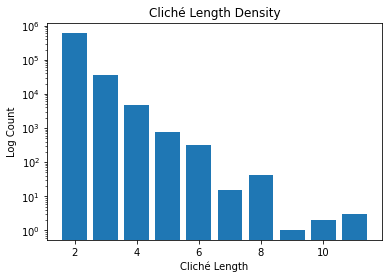

In [10]:
# Create a bar chart
plt.bar(list(average_cliche_lengths.keys()), list(average_cliche_lengths.values()))
plt.yscale('log')

# Set axis labels and title
plt.xlabel('Cliché Length')
plt.ylabel('Log Count')
plt.title('Cliché Length Density')

# Display the plot
plt.show()

Find the 10 most common cliches

In [12]:
# Loop thorugh 10 times
for i in range(1, 11):
    curr_max = 0
    curr_max_key = ""
    
    # Loop through the list of cliche counts
    for key, value in most_common_cliches.items():
        if value > curr_max:
            curr_max = value
            curr_max_key = key
            
    print("{0}. {1}: {2}".format(str(i), curr_max_key, str(curr_max)))
    most_common_cliches[curr_max_key] = -1

1. to t: 239496
2. a if: 52403
3. be that: 43329
4. in in: 40882
5. will do: 17355
6. full of: 16386
7. to own: 12936
8. on par: 12423
9. in face: 10086
10. here there: 9370
